In [1]:
#HOME = "C:\\Users\\paslanpatir\\Documents\\GitHub\\fall21-yurdadonpelin\\"
#HOME = "C:\\Users\\pelin.yurdadon\\Downloads\\fall21-yurdadonpelin-gh-pages\\fall21-yurdadonpelin-gh-pages\\"
setwd(HOME)

#Call necessary packages
options(warn = -1)
options(scipen=999)
require(data.table)
require(tidyverse)
require(ggplot2)
library(skimr)

Loading required package: data.table

Loading required package: tidyverse

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.1     v dplyr   1.0.6
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::between()   masks data.table::between()
x dplyr::filter()    masks stats::filter()
x dplyr::first()     masks data.table::first()
x purrr::flatten()   masks jsonlite::flatten()
x dplyr::lag()       masks stats::lag()
x dplyr::last()      masks data.table::last()
x purrr::transpose() masks data.table::transpose()



# Task 1: Dimensionality Reduction

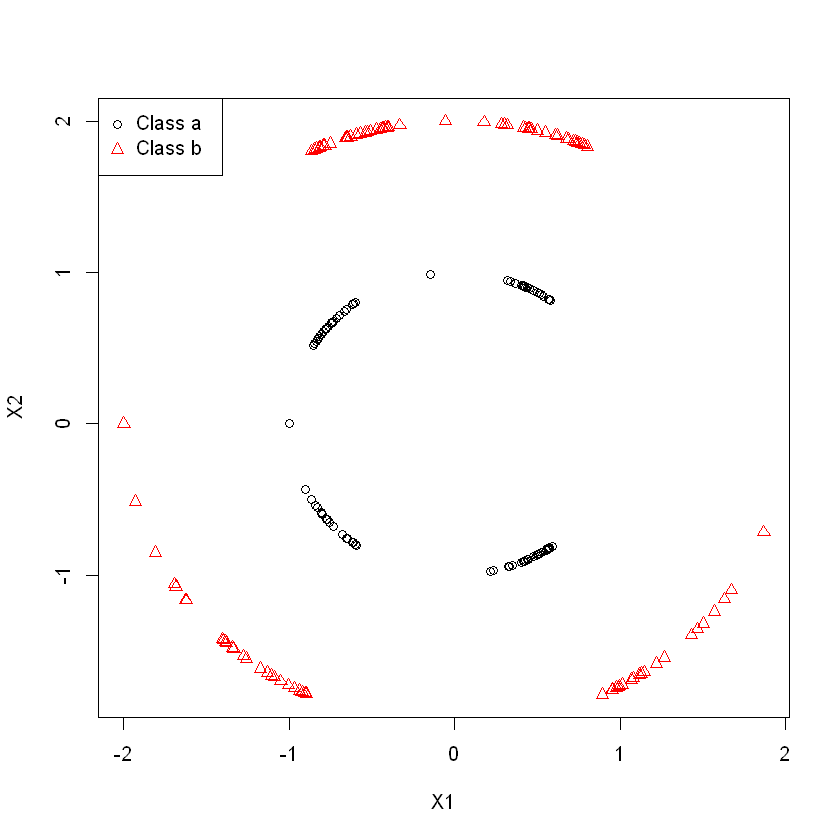

In [2]:
dat=read.csv('IE582_Fall21_HW2_q1_data.csv',header=T)
lev=as.numeric(dat[,3])
plot(dat[,1],dat[,2],col=lev,pch=lev,xlab=names(dat)[1],ylab=names(dat)[2])
legend("topleft",paste("Class",levels(dat[,3])),col=unique(lev), pch= unique(lev))

In [3]:
head(dat)
summary(dat)
skim(dat)

,X1,X2,class
,<dbl>,<dbl>,<fct>
1,0.5694828,0.8220033,a
2,0.4114692,0.9114237,a
3,0.4173846,-0.9087299,a
4,-0.7918276,0.6107447,a
5,-0.8067767,-0.5908565,a
6,-0.7154271,0.6986874,a


       X1                X2          class 
 Min.   :-2.0000   Min.   :-1.7908   a:99  
 1st Qu.:-0.7994   1st Qu.:-0.9445   b:99  
 Median :-0.2408   Median : 0.2578         
 Mean   :-0.1147   Mean   : 0.1006         
 3rd Qu.: 0.5128   3rd Qu.: 0.9786         
 Max.   : 1.8671   Max.   : 1.9992         

-- Data Summary ------------------------
                           Values
Name                       dat   
Number of rows             198   
Number of columns          3     
_______________________          
Column type frequency:           
  factor                   1     
  numeric                  2     
________________________         
Group variables            None  

-- Variable type: factor -------------------------------------------------------
# A tibble: 1 x 6
  skim_variable n_missing complete_rate ordered n_unique top_counts  
* <chr>             <int>         <dbl> <lgl>      <int> <chr>       
1 class                 0             1 FALSE          2 a: 99, b: 99

-- Variable type: numeric ------------------------------------------------------
# A tibble: 2 x 11
  skim_variable n_missing complete_rate   mean    sd    p0    p25    p50   p75
* <chr>             <int>         <dbl>  <dbl> <dbl> <dbl>  <dbl>  <dbl> <dbl>
1 X1                    0             1 -0.115 0.8

*We do not know the unit details of X1 and X2 columns. In other words, we do not know if they have the same unit or if they are scaled or not. Therefore, I assume that their scales are different and they need to be scaled before applying a distance metric.*

## OneDimensional

### PCA

Importance of components:
                          Comp.1    Comp.2
Standard deviation     1.0004424 0.9995574
Proportion of Variance 0.5004425 0.4995575
Cumulative Proportion  0.5004425 1.0000000

Loadings:
   Comp.1 Comp.2
X1  0.707  0.707
X2  0.707 -0.707

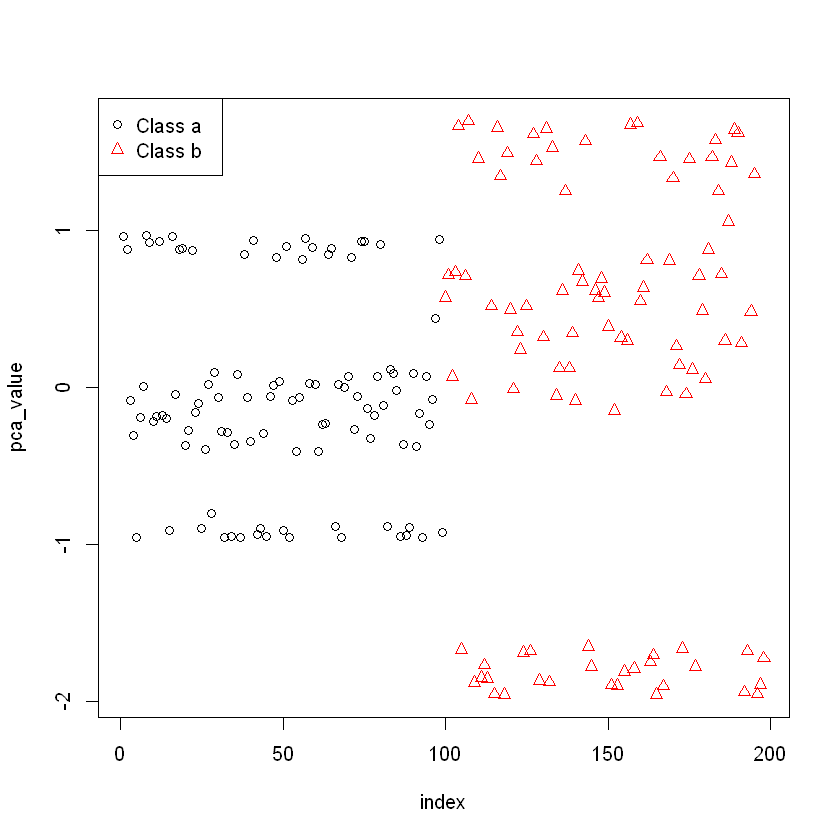

In [4]:
#When princomp is used, there is no need to perform scaling on the data since cor =TRUE takes care of scaling.
pca_dat <- princomp(dat[,-3], cor = TRUE, scores = TRUE)
summary(pca_dat, loadings = TRUE)
pca_var <- pca_dat$scores

plot(x = c(1:nrow(pca_var)),y = pca_var[,1],col=lev,pch=lev, ylab= "pca_value", xlab = "index")
legend("topleft",paste("Class",levels(dat[,3])),col=unique(lev), pch= unique(lev))

Points between 0 and 1 are not easily separable in terms of classes even though points around -2 and around 2 are likely to be in class b.

### MDS

integer(0)

integer(0)

integer(0)

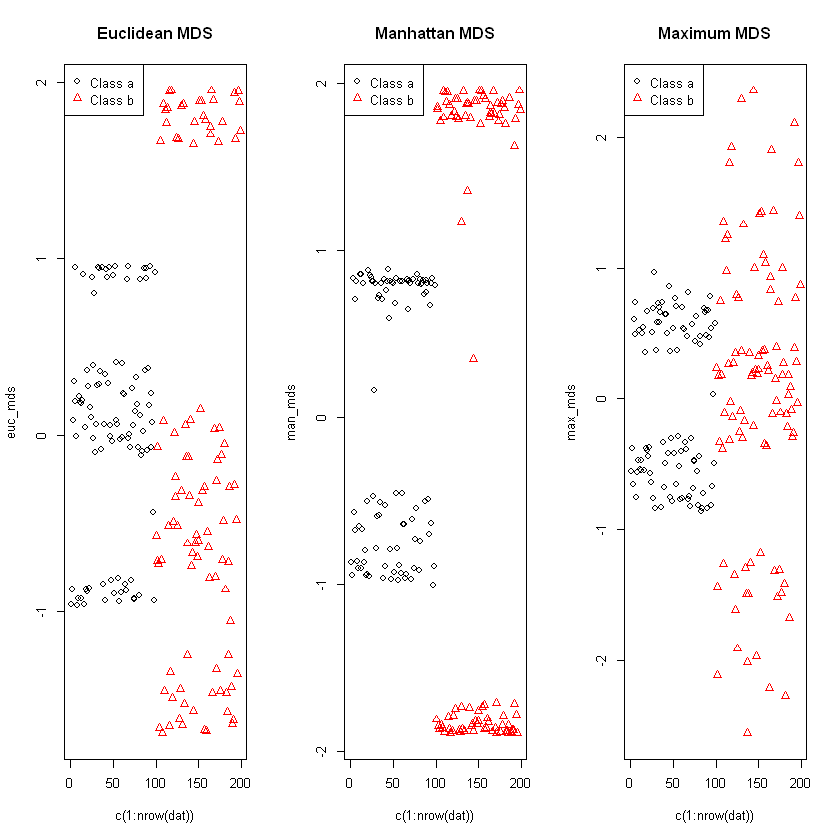

In [5]:
#First scale the data:
scaled_dat <- scale(dat[,-3],center = TRUE, scale = TRUE)
# create distance matrix:
scaled_dist_euc = as.data.table(as.matrix(dist(scaled_dat, method = "euclidean")))
scaled_dist_man = as.data.table(as.matrix(dist(scaled_dat, method = "manhattan")))
scaled_dist_max = as.data.table(as.matrix(dist(scaled_dat, method = "maximum")))

#Apply MDS:
euc_mds = cmdscale(scaled_dist_euc, k = 1) # obtain 1 dimension
man_mds = cmdscale(scaled_dist_man, k = 1) # obtain 1 dimension
max_mds = cmdscale(scaled_dist_max, k = 1) # obtain 1 dimension

par(mfrow=c(1,3))
plot(x = c(1:nrow(dat)),y = euc_mds,col=lev,pch=lev) + title("Euclidean MDS")
legend("topleft",paste("Class",levels(dat[,3])),col=unique(lev), pch= unique(lev))
plot(x = c(1:nrow(dat)),y = man_mds,col=lev,pch=lev) + title("Manhattan MDS")
legend("topleft",paste("Class",levels(dat[,3])),col=unique(lev), pch= unique(lev))
plot(x = c(1:nrow(dat)),y = max_mds,col=lev,pch=lev) + title("Maximum MDS")
legend("topleft",paste("Class",levels(dat[,3])),col=unique(lev), pch= unique(lev))

Depending on the distance measure, MDS results can change considerably as we see in euclidean distance mds and manhattab distance mds. Moreover, unlike euclidean and manhattan mds, maximum MDS graph is more densely populated between -1 and 1.  

### Comparison

integer(0)

integer(0)

integer(0)

integer(0)

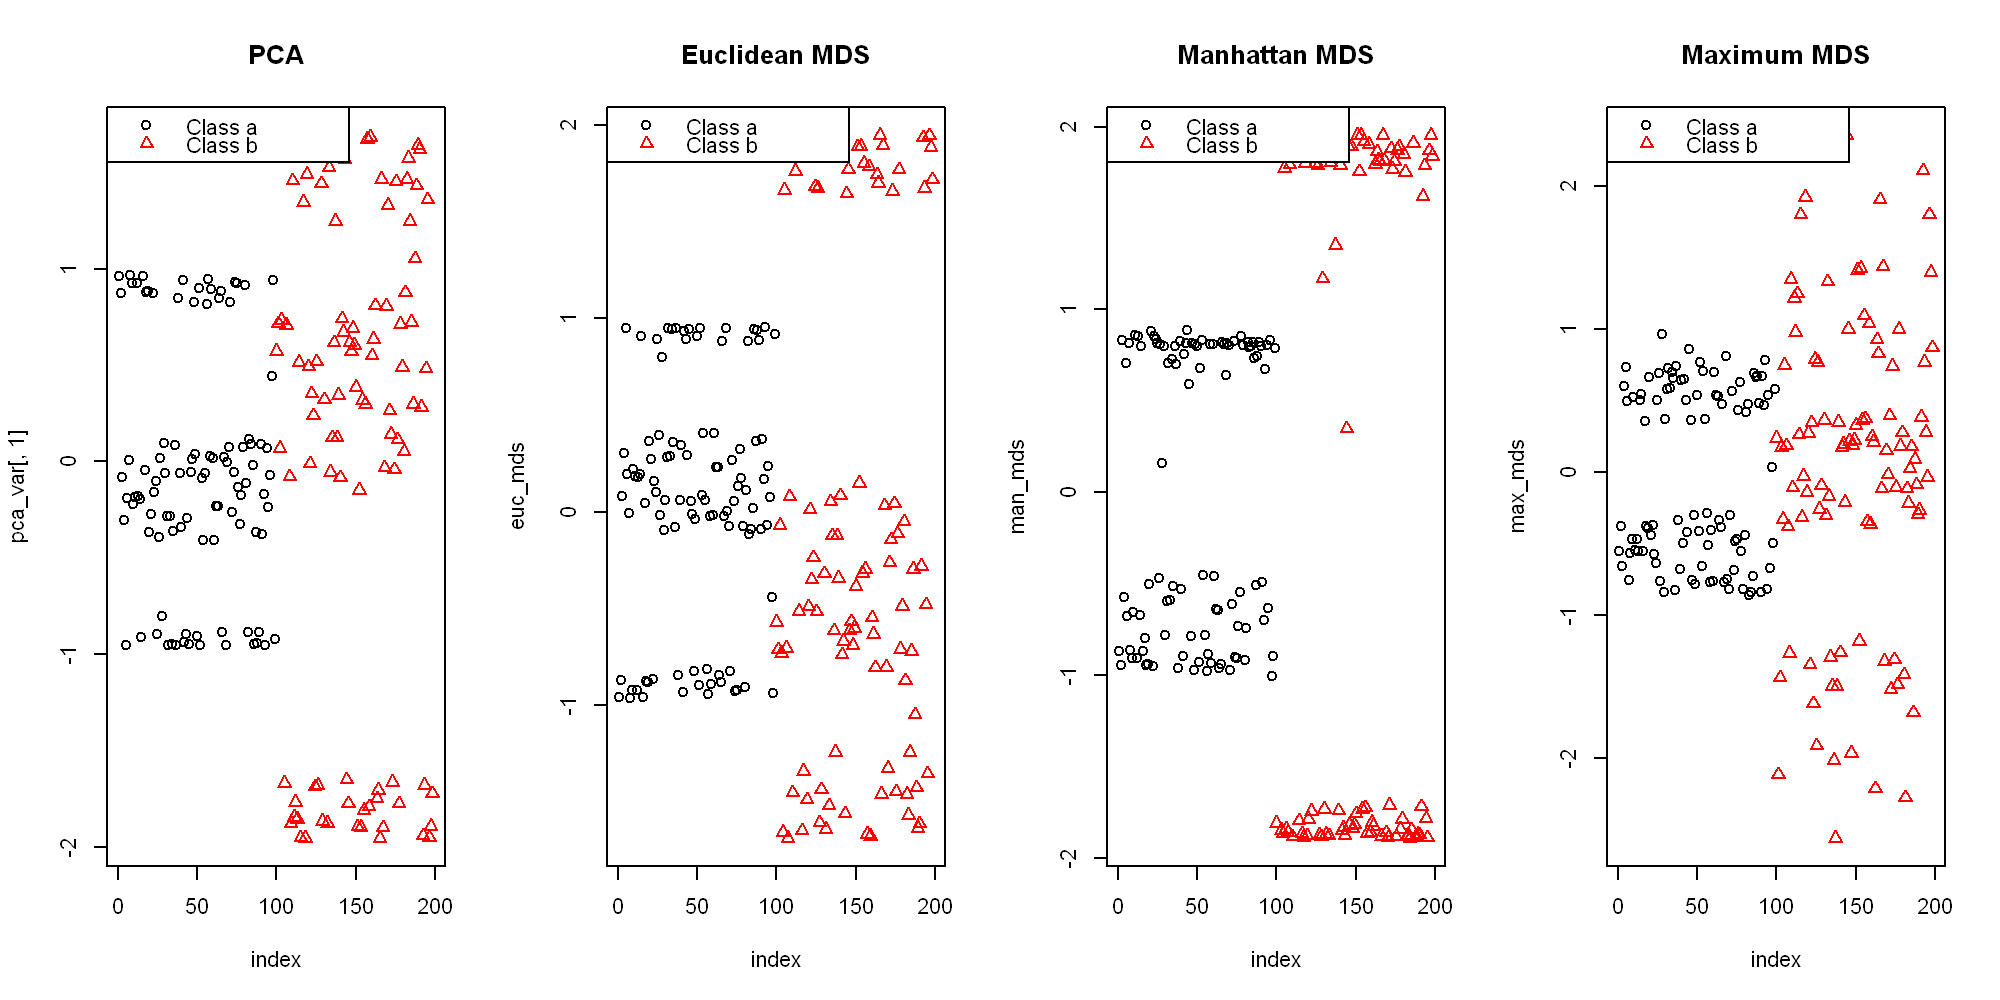

In [6]:
#layout(matrix(c(1,1,1,2,2,2,3,3,3,4,4,4), nrow = 3, ncol = 3, byrow = TRUE))
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 200)
par(mfrow=c(1,4))
plot(x = c(1:nrow(pca_var)),y = pca_var[,1],col=lev,pch=lev, xlab = "index") + title("PCA")
legend("topleft",paste("Class",levels(dat[,3])),col=unique(lev), pch= unique(lev))
plot(x = c(1:nrow(dat)),y = euc_mds,col=lev,pch=lev, xlab = "index") + title("Euclidean MDS")
legend("topleft",paste("Class",levels(dat[,3])),col=unique(lev), pch= unique(lev))
plot(x = c(1:nrow(dat)),y = man_mds,col=lev,pch=lev, xlab = "index") + title("Manhattan MDS")
legend("topleft",paste("Class",levels(dat[,3])),col=unique(lev), pch= unique(lev))
plot(x = c(1:nrow(dat)),y = max_mds,col=lev,pch=lev, xlab = "index") + title("Maximum MDS")
legend("topleft",paste("Class",levels(dat[,3])),col=unique(lev), pch= unique(lev))

PCA does not seem to work well, because there is no such a (linear) horizontal separation between classes. For example, between 0 and 1, pca value does not imply a clear distinction between classes.

Furthermore,
PCA and MDS with euclidean distance seem to be symmetric since PCA uses euclidean distance as well.

It is obvious that the performance of MDS depends on the distance measure. for different measures, we see different transformations.

Only MDS with Manhattan distance can differentiate classes nicely. However,it is not a binary distinction. That is, when mds value is between -1 and 1, a data point is much likely to belong to class a. So, in order to correctly find out class a , we need to cut the space twice.

As a result, PCA did not work satisfactorily in the nonlinear data set. Nonlinearity is stil preserved in transformed components. MDS was better in this data set overallas it provides us with the freedom of choosing the distance measure. 

## Adding Extra Features

In [7]:
dat_dt = as.data.table(dat)
dat_dt[, `:=` (X1_sq = X1^2,
               X2_sq = X2^2,
               X1X2 = X1*X2)]
summary(dat_dt)

       X1                X2          class      X1_sq              X2_sq       
 Min.   :-2.0000   Min.   :-1.7908   a:99   Min.   :0.003305   Min.   :0.0000  
 1st Qu.:-0.7994   1st Qu.:-0.9445   b:99   1st Qu.:0.249322   1st Qu.:0.6560  
 Median :-0.2408   Median : 0.2578          Median :0.457800   Median :0.8974  
 Mean   :-0.1147   Mean   : 0.1006          Mean   :0.708035   Mean   :1.7920  
 3rd Qu.: 0.5128   3rd Qu.: 0.9786          3rd Qu.:0.812388   3rd Qu.:3.2030  
 Max.   : 1.8671   Max.   : 1.9992          Max.   :4.000000   Max.   :3.9967  
      X1X2         
 Min.   :-1.99945  
 1st Qu.:-0.49940  
 Median :-0.30717  
 Mean   :-0.01055  
 3rd Qu.: 0.49849  
 Max.   : 1.99978  

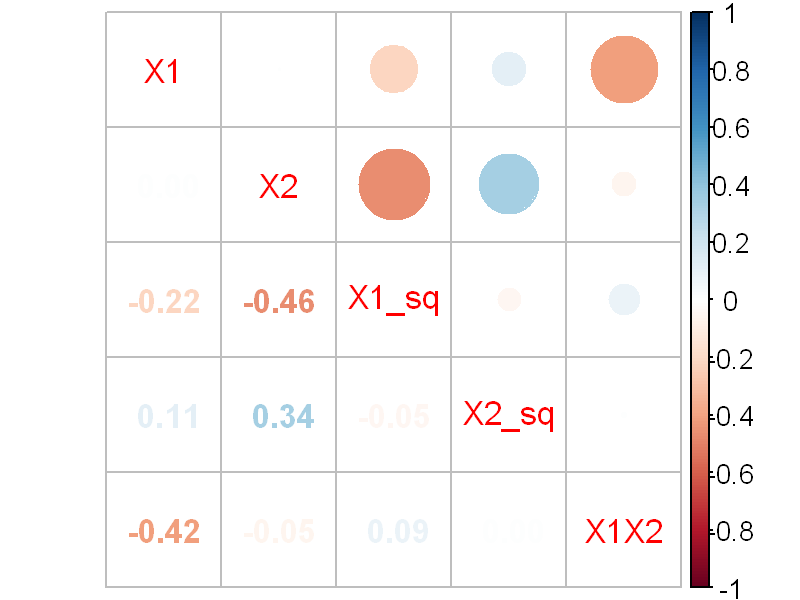

In [8]:
options(repr.plot.width = 4, repr.plot.height = 3, repr.plot.res = 200)
corrplot::corrplot.mixed(cor(dat_dt[,-3]))

Although addition of nonlinear terms increases multicollinearity at some level, correlation between features are not sufficiently high. Therefore, I do not expect that pca would work successfully.

In [9]:
pca_dat_dt <- princomp(dat_dt[,-3], cor = TRUE, scores = TRUE)
summary(pca_dat_dt, loadings = TRUE)
pca_dat_var <- pca_dat_dt$scores

eigen = pca_dat_dt$sdev^2
print("eigenvalues: ")
eigen

Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4     Comp.5
Standard deviation     1.3114557 1.1508988 0.9723549 0.7988684 0.60979578
Proportion of Variance 0.3439832 0.2649136 0.1890948 0.1276382 0.07437018
Cumulative Proportion  0.3439832 0.6088968 0.7979917 0.9256298 1.00000000

Loadings:
      Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
X1     0.419  0.556  0.128  0.571  0.415
X2     0.538 -0.454        -0.368  0.600
X1_sq -0.539  0.162  0.578 -0.273  0.524
X2_sq  0.351 -0.313  0.797  0.127 -0.356
X1X2  -0.348 -0.600         0.669  0.258

[1] "eigenvalues: "


Comp.1    Comp.2    Comp.3    Comp.4    Comp.5 
1.7199160 1.3245681 0.9454741 0.6381908 0.3718509

Eigenvalues represent the variance in the transformed values (components). In a sense, they are the width of the covarage in new axis (over new dimension, etc.).

On the other hands, eigenvectors are represented under 'loadings:'. Each component listed under 'loadings' (i.e. eigenvectors) represents the linear combination of features (x1,x2,x1_sq, etc.).

Therefore, the larger eigenvalue is the more explicability for components.

In this pca study, almost 61% of the total variability is represented by the first two components. Some can define this a successful application.

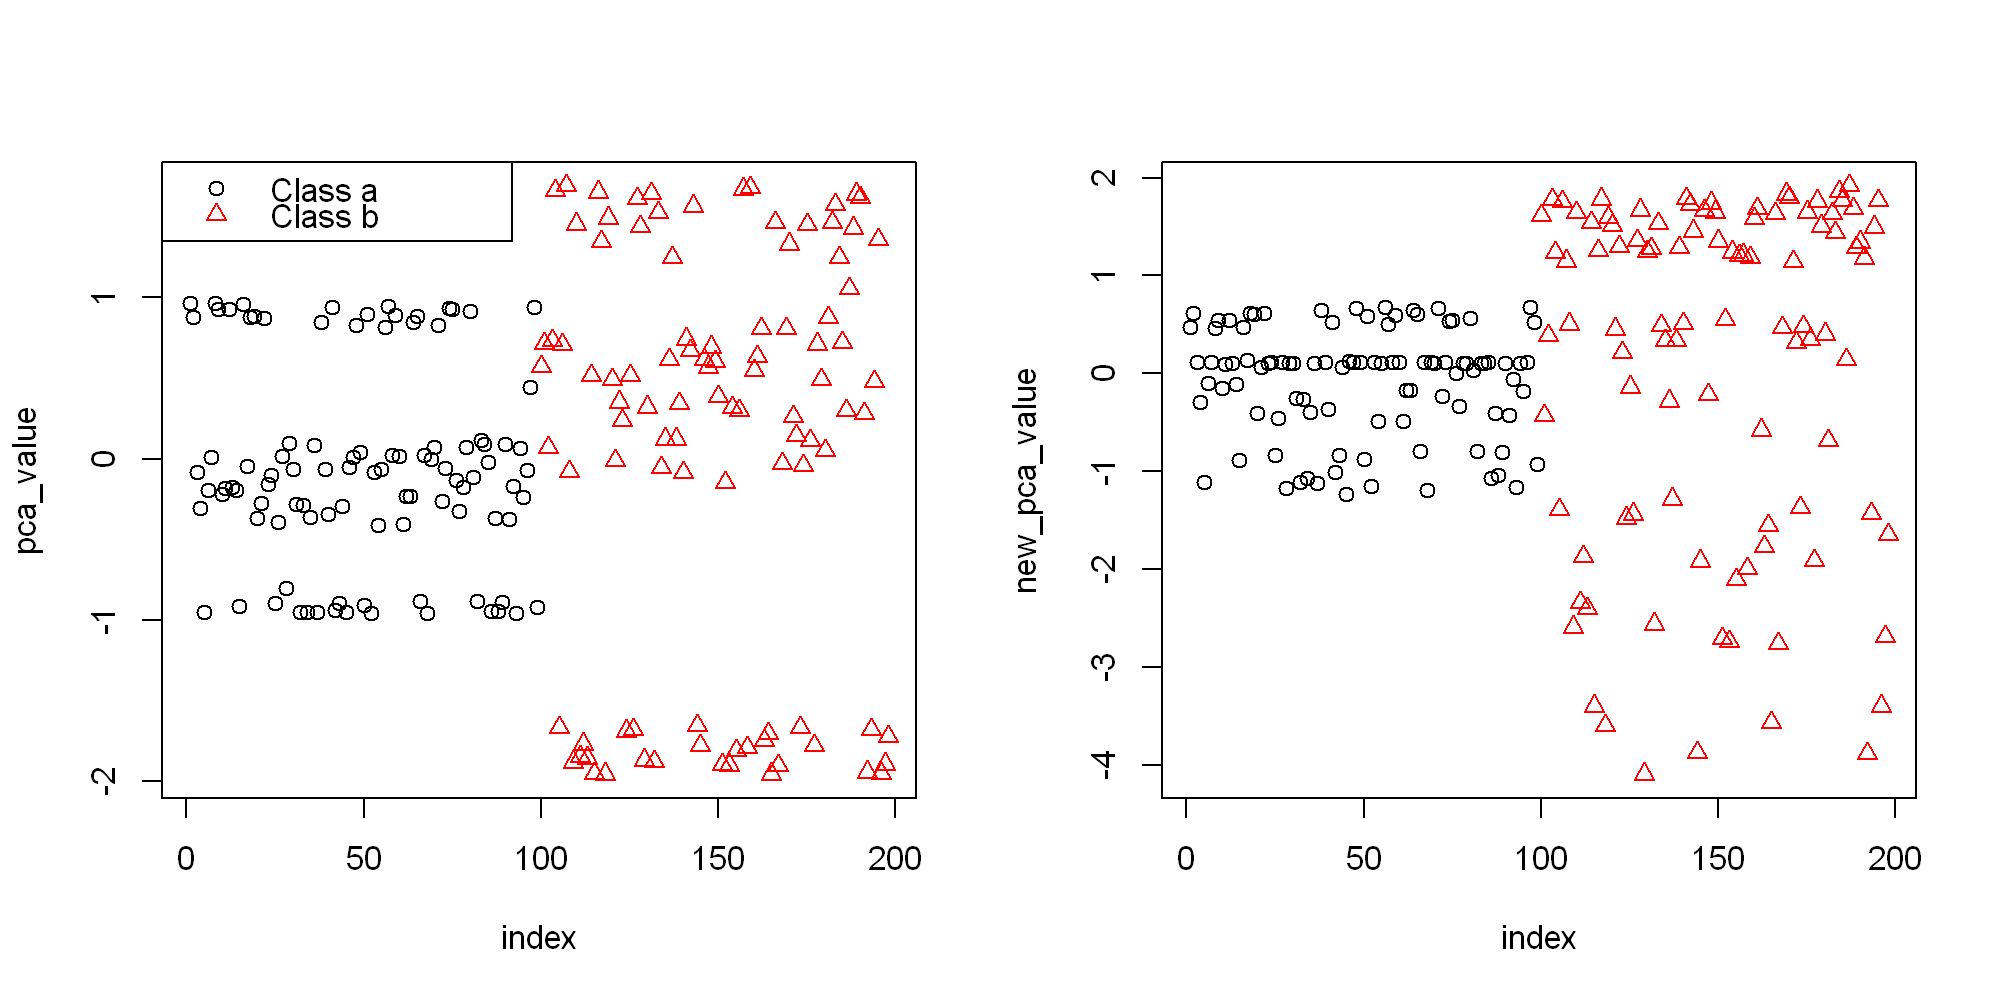

In [10]:
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 200)
par(mfrow=c(1,2))
plot(x = c(1:nrow(pca_var)),y = pca_var[,1],col=lev,pch=lev, ylab= "pca_value", xlab = "index")
legend("topleft",paste("Class",levels(dat[,3])),col=unique(lev), pch= unique(lev))
plot(x = c(1:nrow(pca_dat_var)),y = pca_dat_var[,1],col=lev,pch=lev, ylab= "new_pca_value", xlab = "index")

After new features are added, the range of pca value (scores) increases from [-2,2] to [-4,2].  However, overlaps between class a and class b increases as well. :(

# Task 2: Reconstructig Turkey Map

In [11]:
library("readxl")
# xls files
tr_data <- read_excel("ilmesafe.xls",skip=2)

In [12]:
head(tr_data)

İL PLAKA NO,İL ADI,ADANA,ADIYAMAN,AFYONKARAHİSAR,AĞRI,AMASYA,ANKARA,ANTALYA,ARTVİN,...,BATMAN,ŞIRNAK,BARTIN,ARDAHAN,IĞDIR,YALOVA,KARABÜK,KİLİS,OSMANİYE,DÜZCE
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
01,ADANA,NA,335,575,966,603,567,535,1035,...,621,709,782,1042,1066,899,714,246,87,735
02,ADIYAMAN,335,NA,910,648,632,814,870,751,...,303,471,1023,758,748,1147,955,210,248,976
03,AFYONKARAHISAR,575,910,NA,1318,597,300,290,1243,...,1196,1284,515,1351,1461,338,447,821,662,375
04,AGRI,966,648,1318,NA,738,1141,1428,396,...,369,430,1175,310,143,1363,1106,814,879,1192
05,AMASYA,603,632,597,736,NA,413,825,695,...,796,982,437,783,881,625,368,639,608,454
06,ANKARA,492,742,256,1054,333,NA,542,979,...,1001,1147,283,1087,1197,407,215,710,579,236


In [13]:
tr_data[is.na(tr_data)] <- 0
tr_lev=tr_data$`IL ADI`

integer(0)

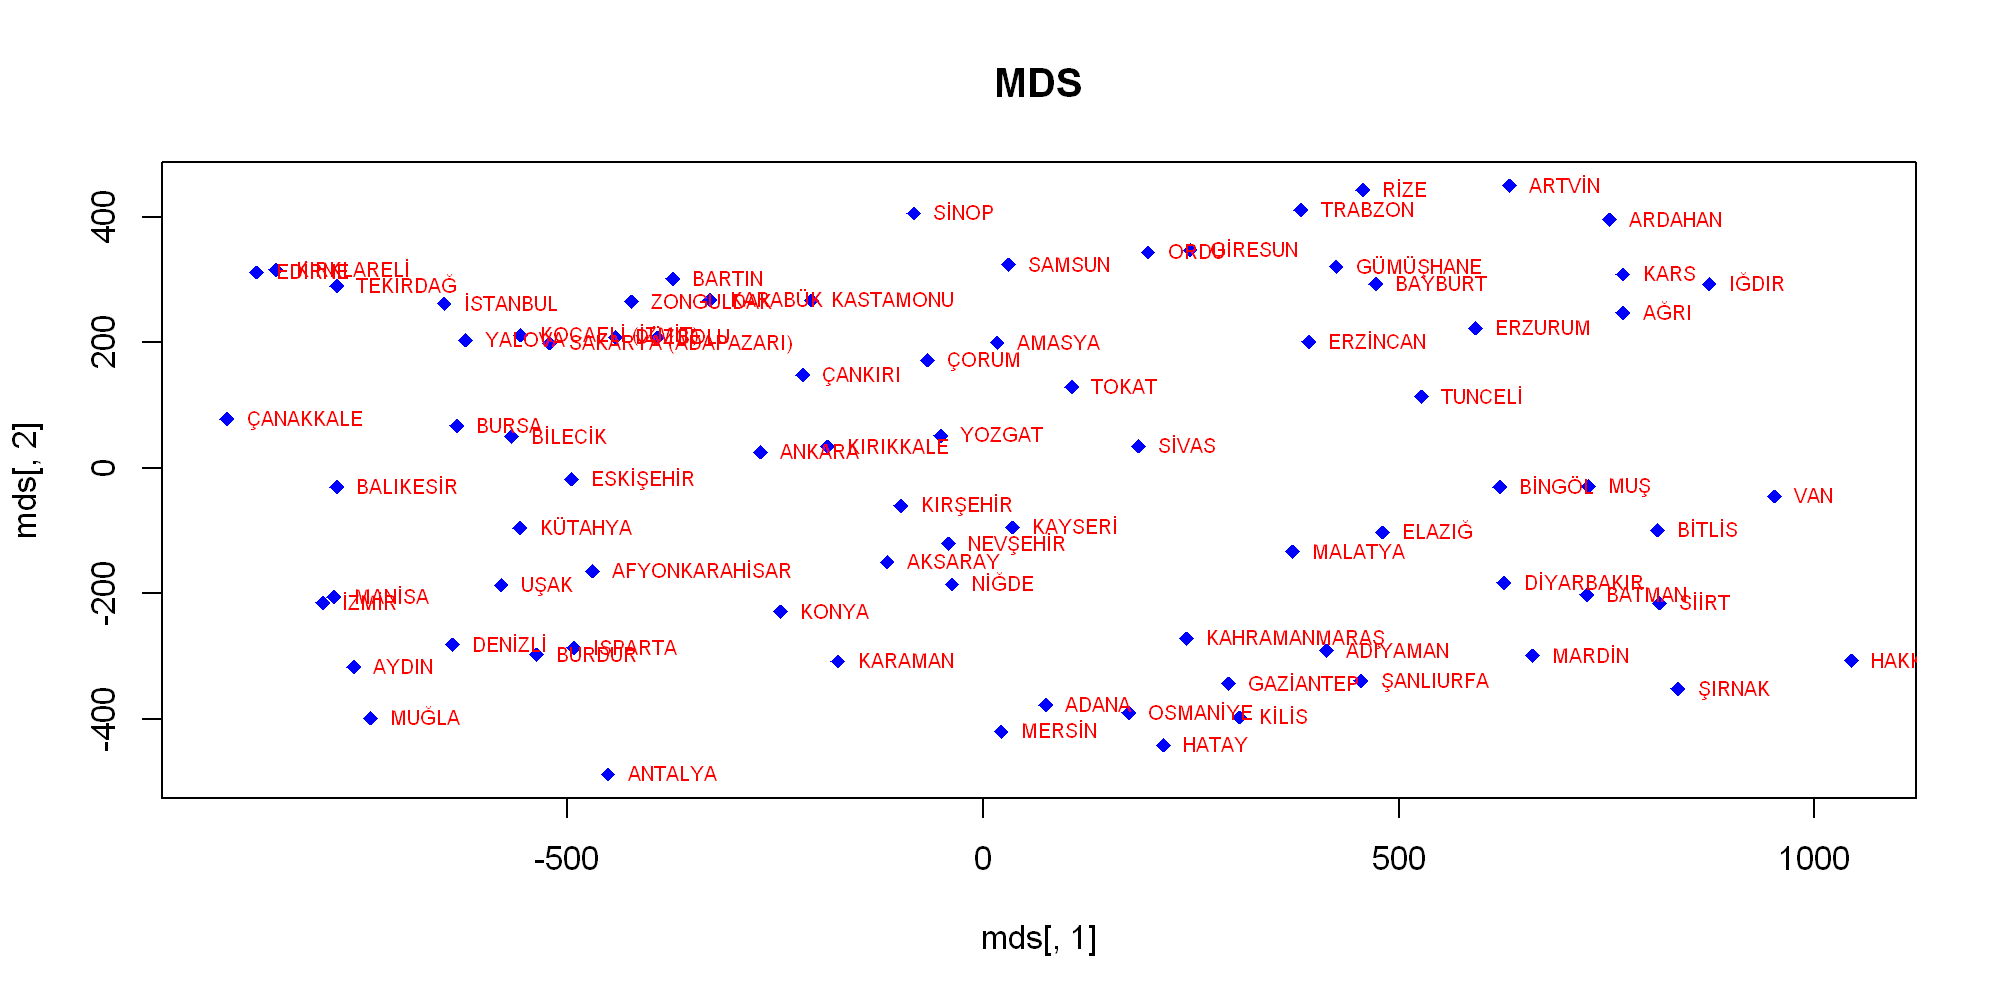

In [14]:
#Apply MDS:
mds = cmdscale(tr_data[,-c(1:2)], k = 2) # obtain 2 dimension
plot(mds[,1], mds[,2],
    # main = "Familiarity with law vs Judicial integrity",
    # xlab = "Familiarity", ylab = "Integrity",
     pch = 18, col = "blue" ) + title("MDS")
# Plot the labels
text(mds[,1], mds[,2],
     labels = tr_lev,
     cex = 0.6, pos = 4, col = "red")

The above plot obtained with MDS is very similar to Turkey map. In general, the relative distances between cities are represented very well. 

Locations of some cities, on the other hand, are depicted wrong. Çanakkale, Hatay and Hakkari are some of those cities. 

Probably due to bad road conditions, distance to Hakkari must be large in the data set. In case of Çanakkale, islands (Bozcaada and Gökçeada) are far from the city center. Distance to the islands must be considered in the given data set, therefore, Çanakkale must seem to far away from Balıkesir. 


# Task 3: Dimensionality Reduction for TimeSeries Data

In [15]:
x_train = fread("uWaveGestureLibrary_X_TRAIN.csv")
y_train = fread("uWaveGestureLibrary_Y_TRAIN.csv")
z_train = fread("uWaveGestureLibrary_Z_TRAIN.csv")

# add idx to the data sets
x_train[, idx := 1:.N]
y_train[, idx := 1:.N]
z_train[, idx := 1:.N]

# Calculate velocity and locations 
x_loc = copy(x_train)
y_loc = copy(y_train)
z_loc = copy(z_train)

# velocity
x_loc[, paste0("V",(2:316)) := as.list(cumsum(unlist(.SD))), 1:nrow(x_loc),.SDcols = paste0("V",(2:316))]
y_loc[, paste0("V",(2:316)) := as.list(cumsum(unlist(.SD))), 1:nrow(y_loc),.SDcols = paste0("V",(2:316))]
z_loc[, paste0("V",(2:316)) := as.list(cumsum(unlist(.SD))), 1:nrow(z_loc),.SDcols = paste0("V",(2:316))]

# locations
x_loc[, paste0("V",(2:316)) := as.list(cumsum(unlist(.SD))), 1:nrow(x_loc),.SDcols = paste0("V",(2:316))]
y_loc[, paste0("V",(2:316)) := as.list(cumsum(unlist(.SD))), 1:nrow(y_loc),.SDcols = paste0("V",(2:316))]
z_loc[, paste0("V",(2:316)) := as.list(cumsum(unlist(.SD))), 1:nrow(z_loc),.SDcols = paste0("V",(2:316))]

In [16]:
# consider gestures listed below 
x_loc[,.(idx_ref = min(idx)),.(V1)][order(V1)]

idx_ref = x_loc[,.(idx_ref = min(idx)),.(V1)][order(V1)]$idx_ref

V1,idx_ref
<dbl>,<int>
1,11
2,15
3,4
4,5
5,2
6,1
7,7
8,6


In [17]:
x_loc_molten = melt(x_loc[idx %in% idx_ref], id.vars=c("idx","V1"))
y_loc_molten = melt(y_loc[idx %in% idx_ref], id.vars=c("idx","V1"))
z_loc_molten = melt(z_loc[idx %in% idx_ref], id.vars=c("idx","V1"))

setnames(x_loc_molten,"value","x")
setnames(y_loc_molten,"value","y")
setnames(z_loc_molten,"value","z")

data = merge(x_loc_molten,y_loc_molten, by = c("idx","V1","variable"), all.x = TRUE)
data = merge(data,z_loc_molten, by = c("idx","V1","variable"), all.x = TRUE)

data$V1 = as.factor(data$V1)
head(data)

idx,V1,variable,x,y,z
<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,6,V2,-0.3042432,-2.119396,-1.528965
1,6,V3,-0.9127296,-6.358187,-4.586895
1,6,V4,-1.8254593,-12.716375,-9.173791
1,6,V5,-3.0424321,-21.193958,-15.289651
1,6,V6,-4.5636481,-31.790937,-22.934476
1,6,V7,-6.3891074,-44.507312,-32.108267


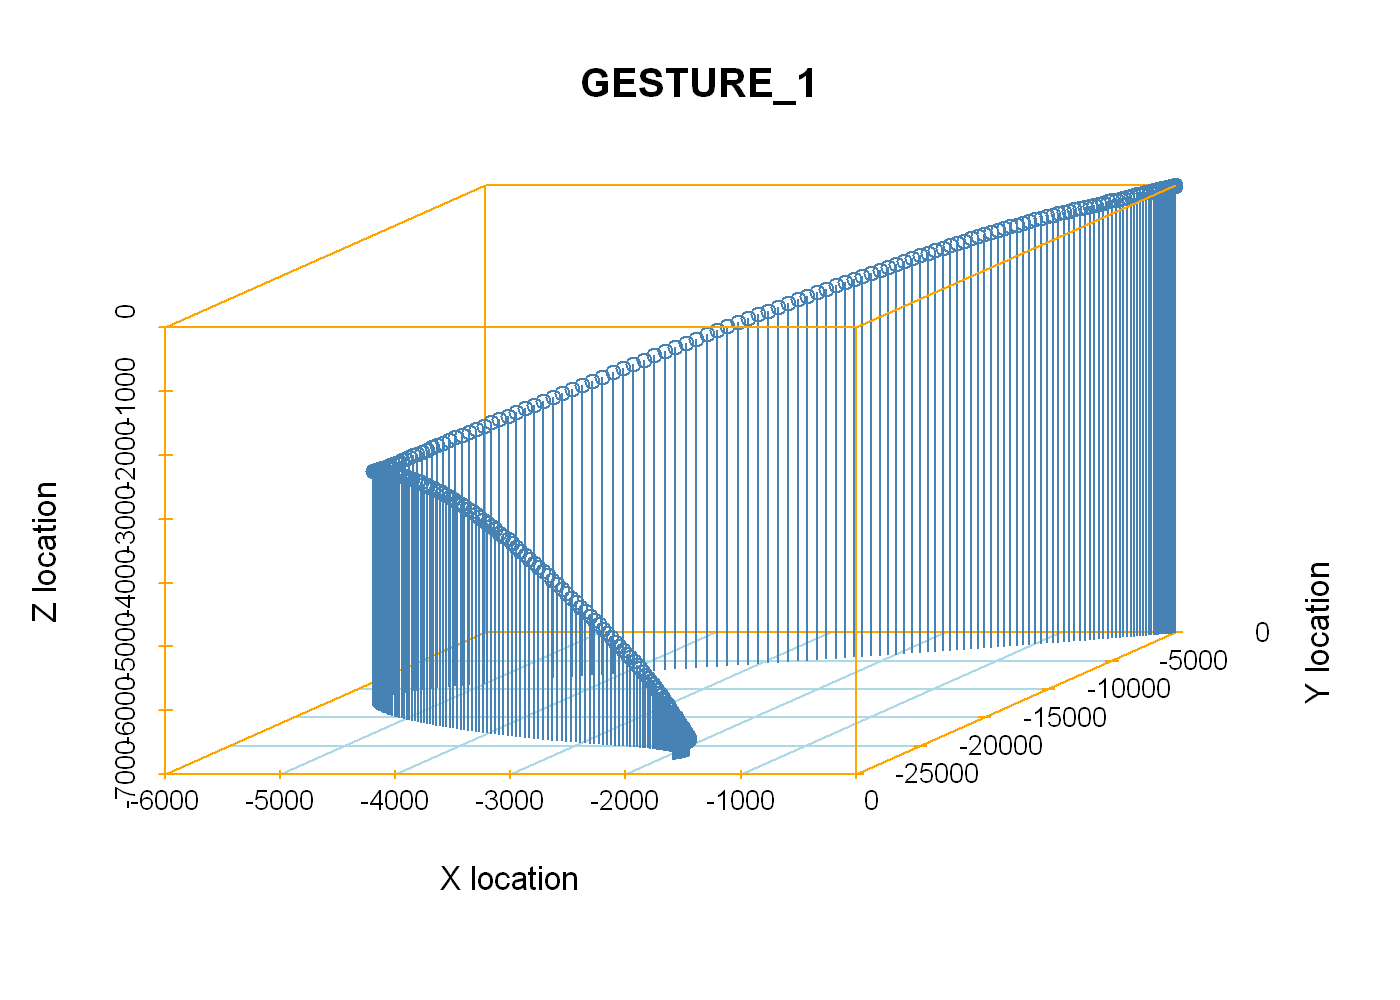

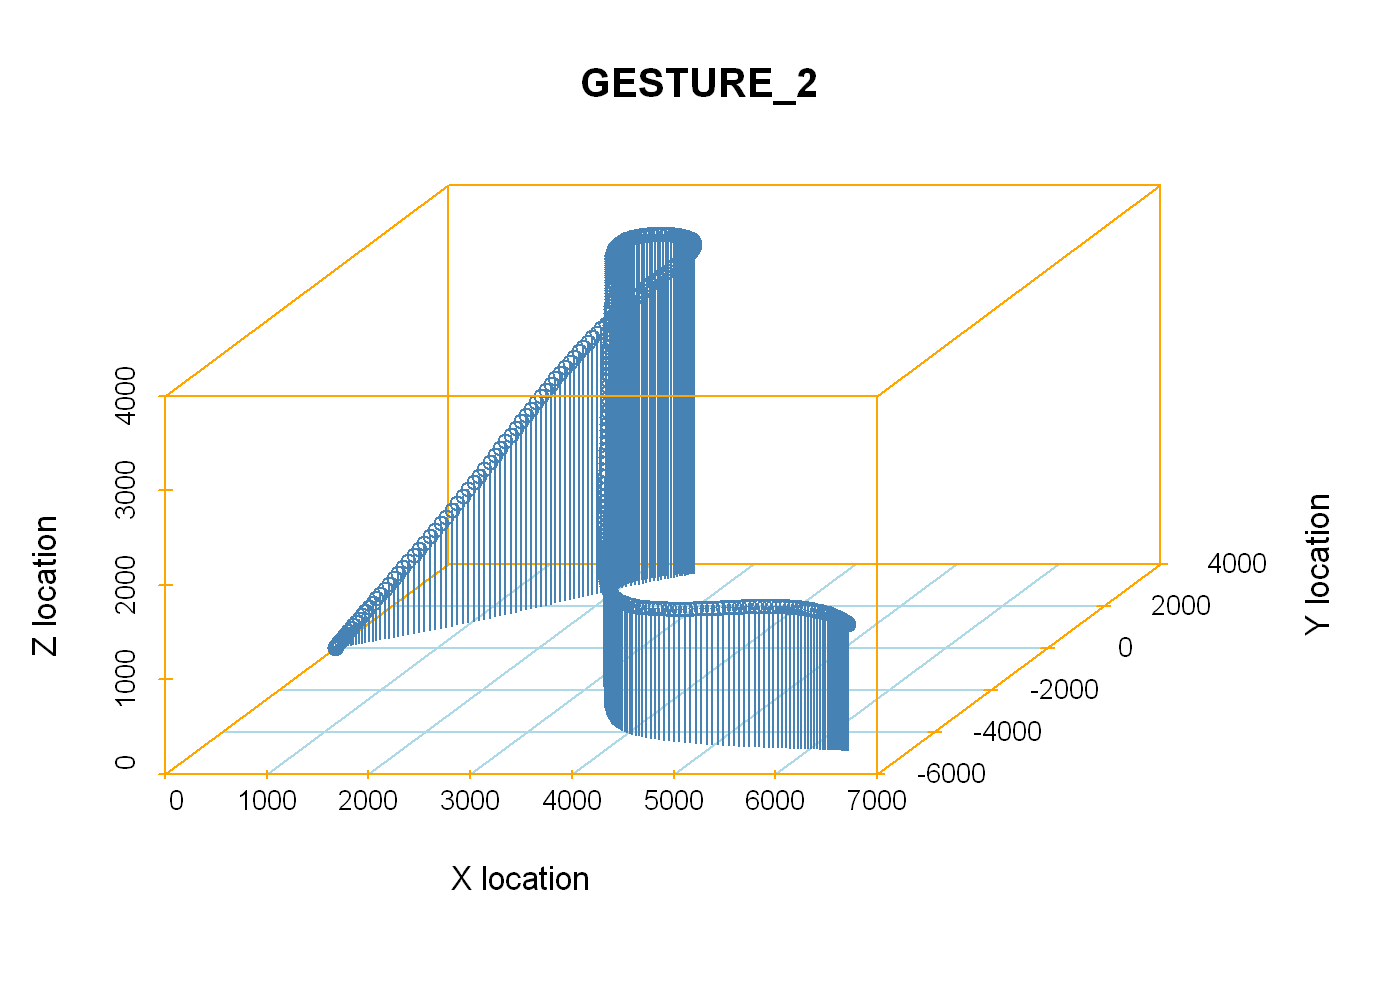

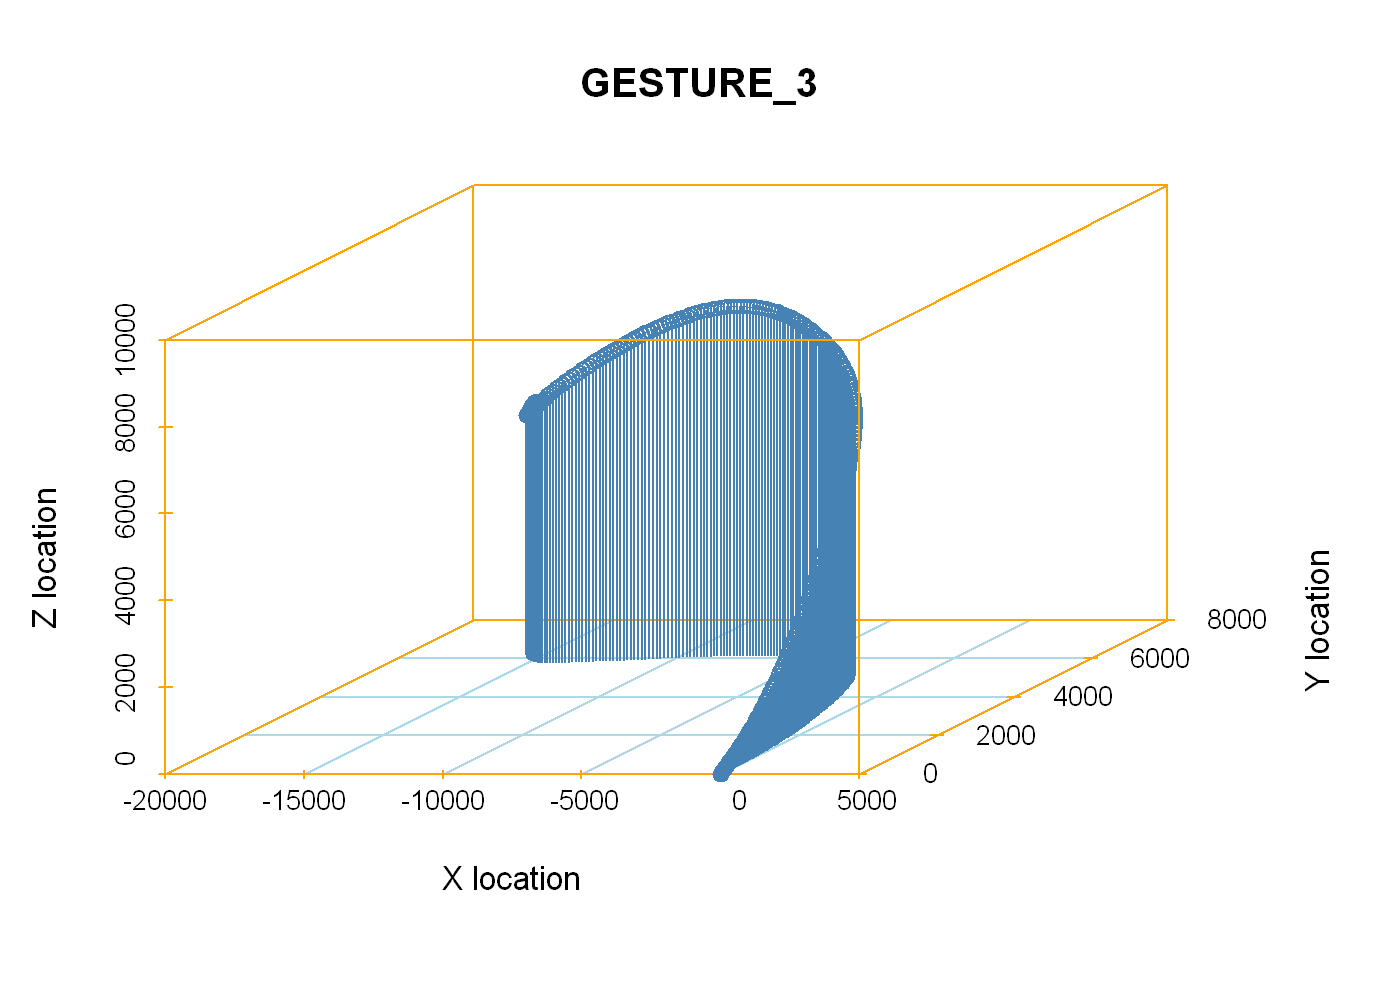

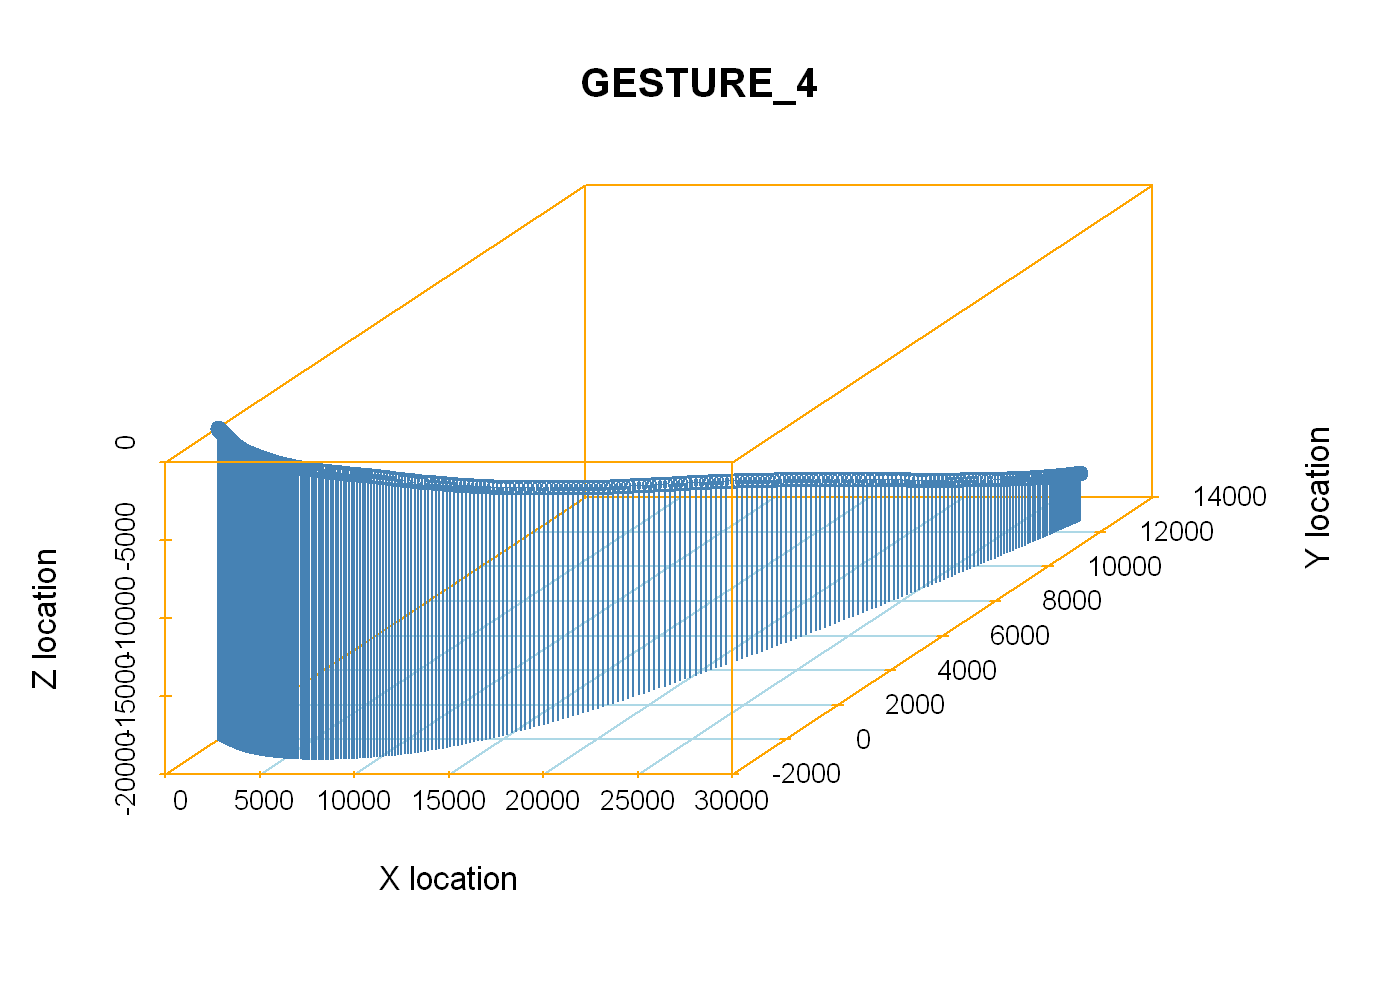

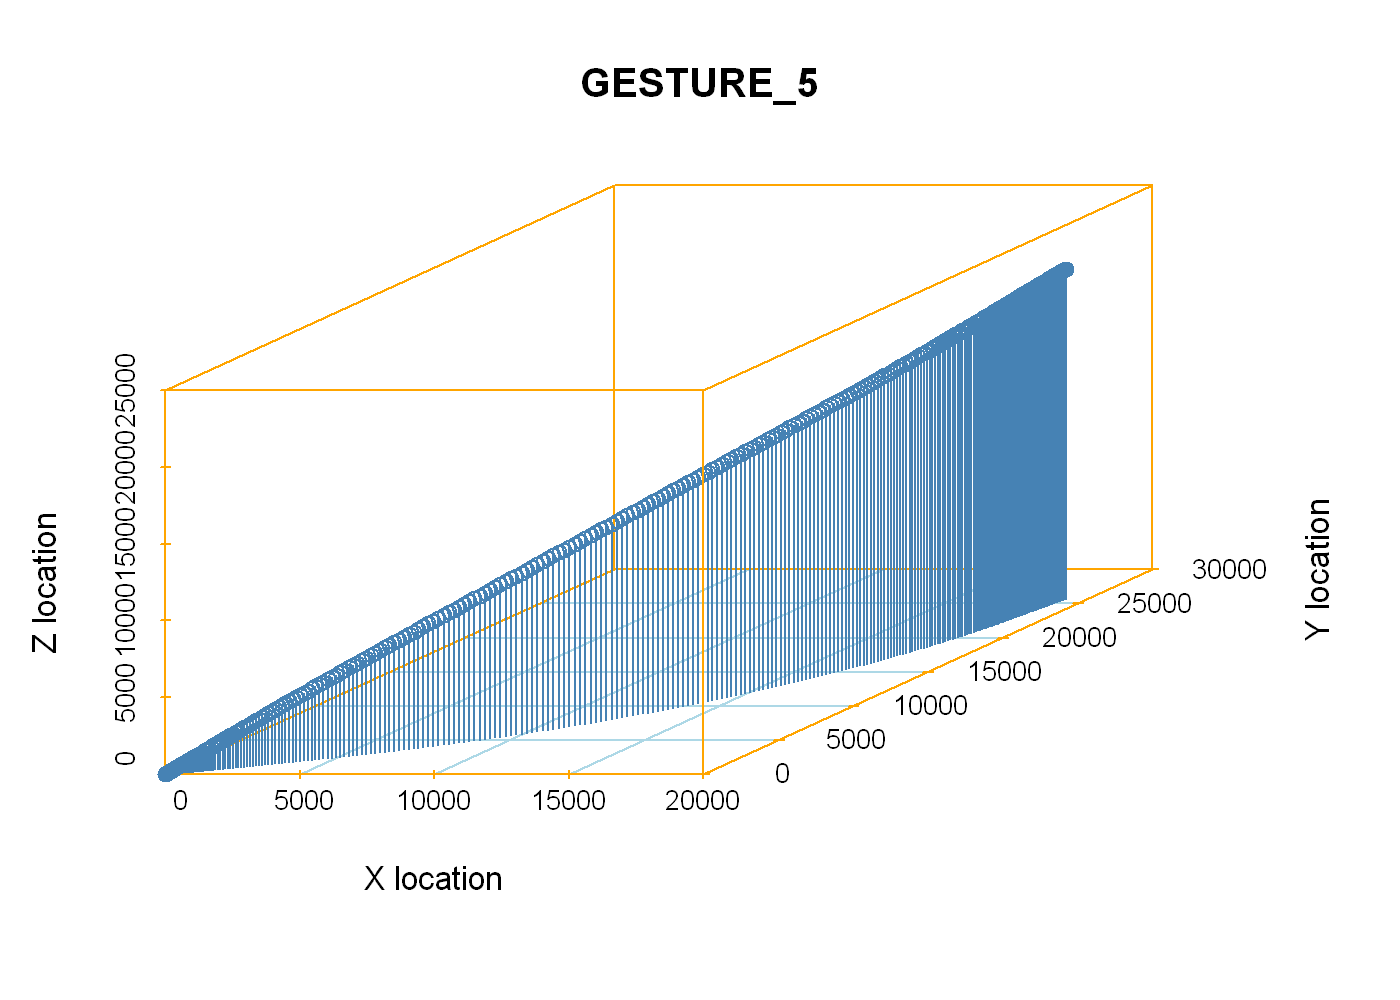

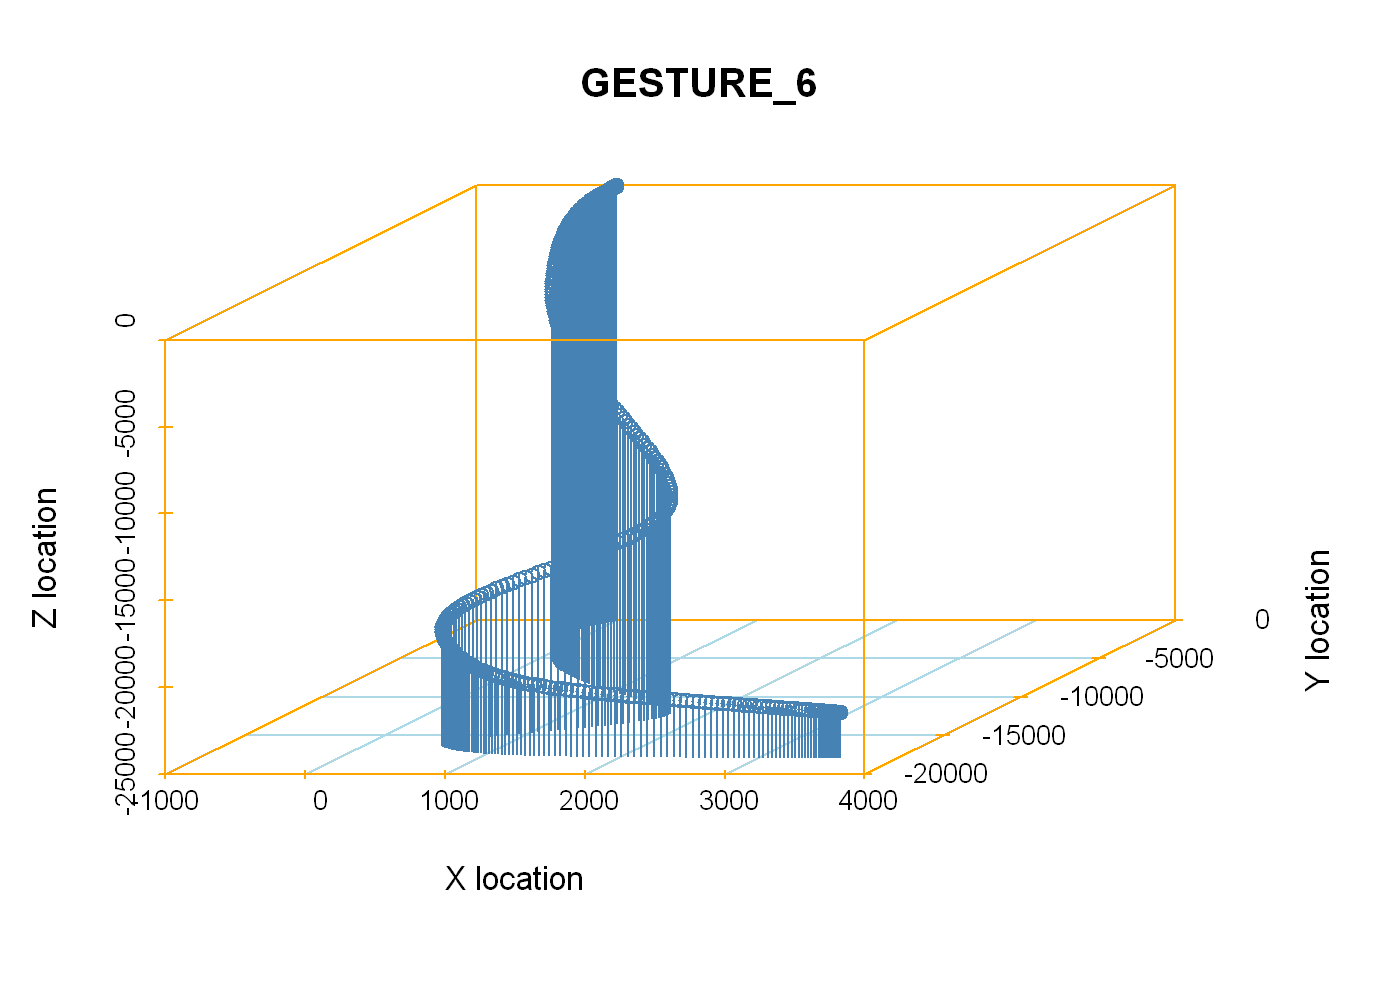

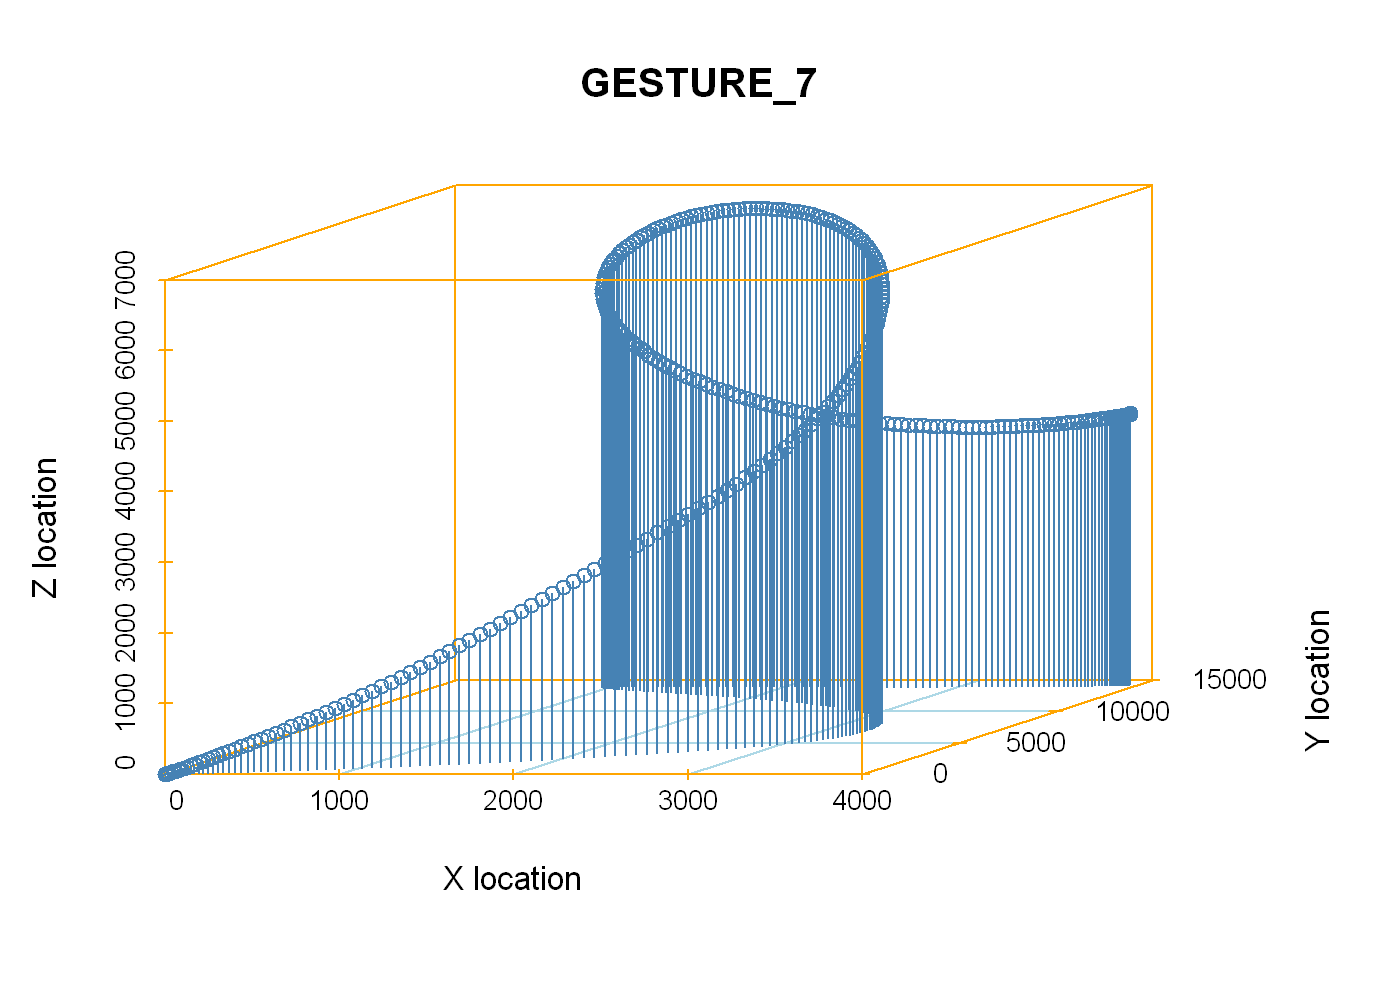

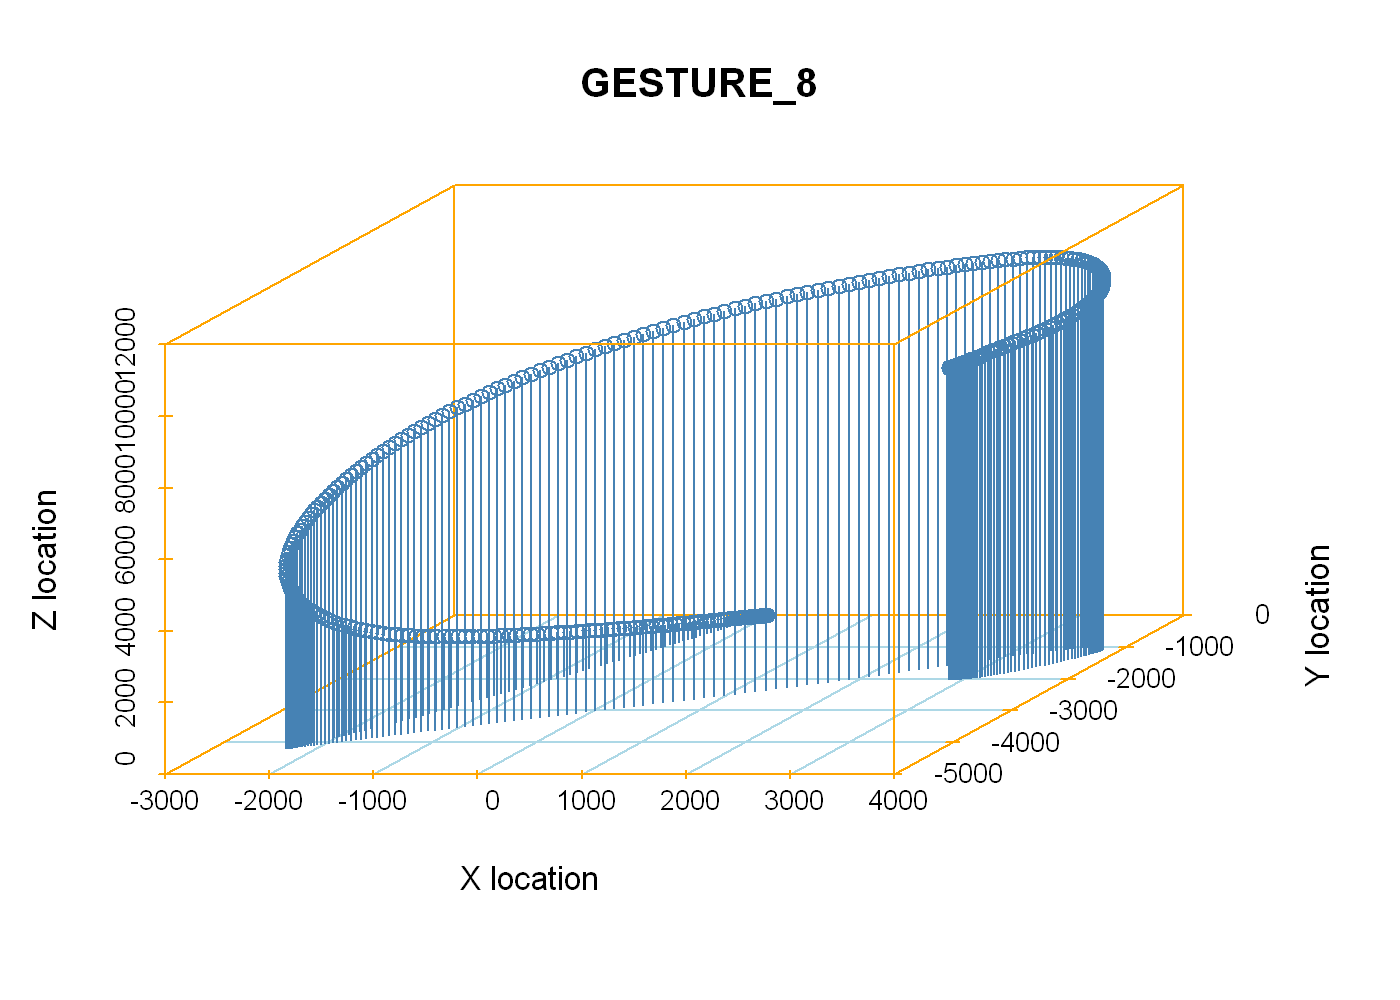

In [18]:
library(scatterplot3d)
max_x <- max(data$x)
min_x <- min(data$x)
max_y <- max(data$y)
min_y <- min(data$y)
max_z <- max(data$z)
min_z <- min(data$z)



for( i in idx_ref){
    focus_dt = data[idx == i] 
    gesture = unique(focus_dt$V1)
    
options(repr.plot.width = 7, repr.plot.height = 5, repr.plot.res = 200)
par(mfrow=c(1,1))
scatterplot3d(focus_dt[,.(x,y,z)],col.axis="orange"
                  ,main = paste0("GESTURE_",gesture)
                  ,xlab = "X location"
                  ,ylab = "Y location"
                  ,zlab = "Z location"
                  ,col.grid="lightblue"
                  ,type = "h"
                  ,color = "steelblue"
           #   ,xlim=c(min_x,max_x)
           #   ,ylim=c(min_y,max_y)
           #   ,zlim=c(min_z,max_z)
             )
}




Gestures represented on the paper are not very obvious in the above visualizations. However, rounded shaped gestures are better represented.


## PCA

In [19]:
colnames(x_train) <- paste("x", colnames(x_train), sep = "_")
colnames(y_train) <- paste("y", colnames(y_train), sep = "_")
colnames(z_train) <- paste("z", colnames(z_train), sep = "_")
setnames(x_train,c("x_V1","x_idx"),c("class","idx"))
setnames(y_train,c("y_V1","y_idx"),c("class","idx"))
setnames(z_train,c("z_V1","z_idx"),c("class","idx"))

dt = merge(x_train,y_train, by = c("class","idx"), all = TRUE)
dt = merge(dt,z_train, by = c("class","idx"), all = TRUE)
head(dt)

class,idx,x_V2,x_V3,x_V4,x_V5,x_V6,x_V7,x_V8,x_V9,...,z_V307,z_V308,z_V309,z_V310,z_V311,z_V312,z_V313,z_V314,z_V315,z_V316
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,11,-0.7914472,-0.7914472,-0.7958727,-0.8100650,-0.8492300,-0.9034648,-0.9311463,-0.9506034,...,-0.007064043,0.005635896,0.005635896,0.005635896,0.005635896,0.005635896,0.005635896,0.005635896,0.0056358959,0.005635896
1,17,-0.4496024,-0.4496024,-0.4496024,-0.4496024,-0.4496024,-0.4496024,-0.4496024,-0.4496024,...,0.818898610,0.836255730,0.843713110,0.843713110,0.865129740,0.894523900,0.928200950,0.961877850,0.9955547400,1.029231600
1,19,-0.1874689,-0.1874689,-0.1874689,-0.1874689,-0.1874689,-0.1874689,-0.1874689,-0.1874689,...,0.251094240,0.272352210,0.285509200,0.298452750,0.310528340,0.321015040,0.321015040,0.321015040,0.3210150400,0.321015040
1,23,0.3014817,0.3014817,0.3014817,0.3014817,0.3014817,0.3014817,0.3014817,0.3014817,...,0.046817682,0.046817682,0.046817682,0.046142200,0.042719759,0.038071443,0.025332352,0.012593260,-0.0001458324,-0.012884924
1,38,0.1632022,0.1632022,0.1632022,0.1632022,0.1632022,0.1632022,0.1632022,0.1632022,...,0.684985310,0.678932910,0.657091280,0.610350060,0.563609010,0.516867900,0.470126680,0.423385450,0.3766442300,0.329903000
1,43,-0.9319900,-0.9319900,-0.9319900,-0.9319900,-0.9319900,-0.9319900,-0.9319900,-0.9319900,...,-0.123477210,-0.159502030,-0.210131480,-0.273817140,-0.326935460,-0.364647520,-0.396490350,-0.428333180,-0.4601760300,-0.492018850


*Since princomp does not work when p > n, I'll use prcomp*

In [20]:
gesture_list = c(1:8)
for( i in gesture_list){
    focus_dt = dt[class == i] 
    pca_data <- prcomp(focus_dt[,-c(1:2)],scale =T)
    assign(paste0("pca_",i), pca_data) 
}

In [23]:
draw_eigenv = function(pca,gesture){
    plot(pca$rotation[,2], type="l",col="orange", main= paste0("Gesture_",gesture), ylab= "Eigenvector")
    points(pca$rotation[,1],type="l",col="blue")
    legend("topleft",paste("Eigenvector",c("2","1")),col=c("orange", "blue"), pch= 16,cex= 0.6)
}


calc_cum_var = function(pca){
props = (pca$sdev^2) / sum(pca$sdev^2)
return(cumsum(props))
}

print_cum_var = function(pca){
    print(paste0(100*round(calc_cum_var(pca)[2],3),"% of variability is covered by the first two components."))

}

draw_component = function(pca){
    pattern_dt = data.table(axis = c(rep("x",315),rep("y",315),rep("z",315))
                       ,vector1 = pca$rotation[,1]
                       ,vector2 = pca$rotation[,2]
                       ,index = rep(c(1:315),3))

#pattern_dt_molten= melt(pattern_dt, id.vars = c("axis","index"))
#options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 200)
#ggplot(data = pattern_dt_molten, aes(x = index, y = value, group = axis, color = axis) ) + geom_line() + facet_wrap(~variable)
options(repr.plot.width = 7, repr.plot.height = 5, repr.plot.res = 200)
par(mfrow=c(1,1))
scatterplot3d(x = pattern_dt[axis == 'x']$vector1, y = pattern_dt[axis == 'y']$vector1
              ,z = pattern_dt[axis == 'z']$vector1
    ,col.axis="orange"
                  ,main = paste0("First Component Gesture")
                  ,xlab = "X location"
                  ,ylab = "Y location"
                  ,zlab = "Z location"
                  ,col.grid="lightblue"
                  ,type = "h"
                  ,color = "orange"
           #   ,xlim=c(min_x,max_x)
           #   ,ylim=c(min_y,max_y)
           #   ,zlim=c(min_z,max_z)
             )
}



### Gesture 1

[1] "32.3% of variability is covered by the first two components."


Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     13.008 11.6611 9.47835 9.10774 8.41792 7.60183 6.96658
Proportion of Variance  0.179  0.1439 0.09507 0.08778 0.07499 0.06115 0.05136
Cumulative Proportion   0.179  0.3229 0.41801 0.50579 0.58077 0.64192 0.69328
                           PC8     PC9    PC10    PC11   PC12    PC13    PC14
Standard deviation     5.76440 5.44149 4.61545 4.53240 4.4975 4.11365 4.01000
Proportion of Variance 0.03516 0.03133 0.02254 0.02174 0.0214 0.01791 0.01702
Cumulative Proportion  0.72844 0.75978 0.78232 0.80406 0.8255 0.84337 0.86038
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     3.48704 3.38034 3.30479 3.14523 2.88486 2.78164 2.67555
Proportion of Variance 0.01287 0.01209 0.01156 0.01047 0.00881 0.00819 0.00758
Cumulative Proportion  0.87325 0.88534 0.89690 0.90737 0.91617 0.92436 0.93194
                          PC22    

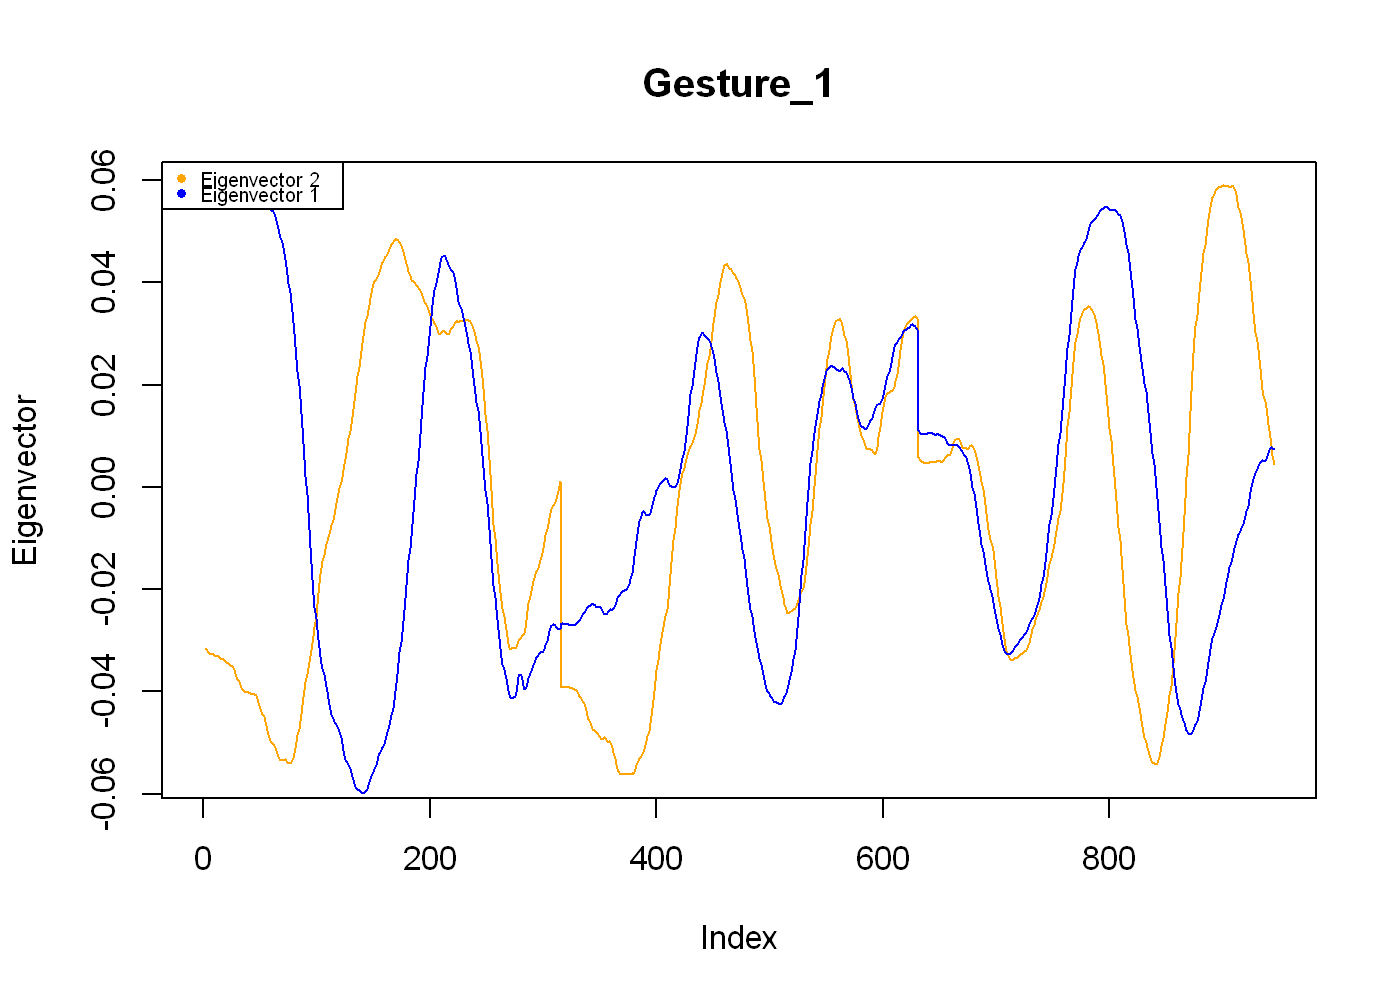

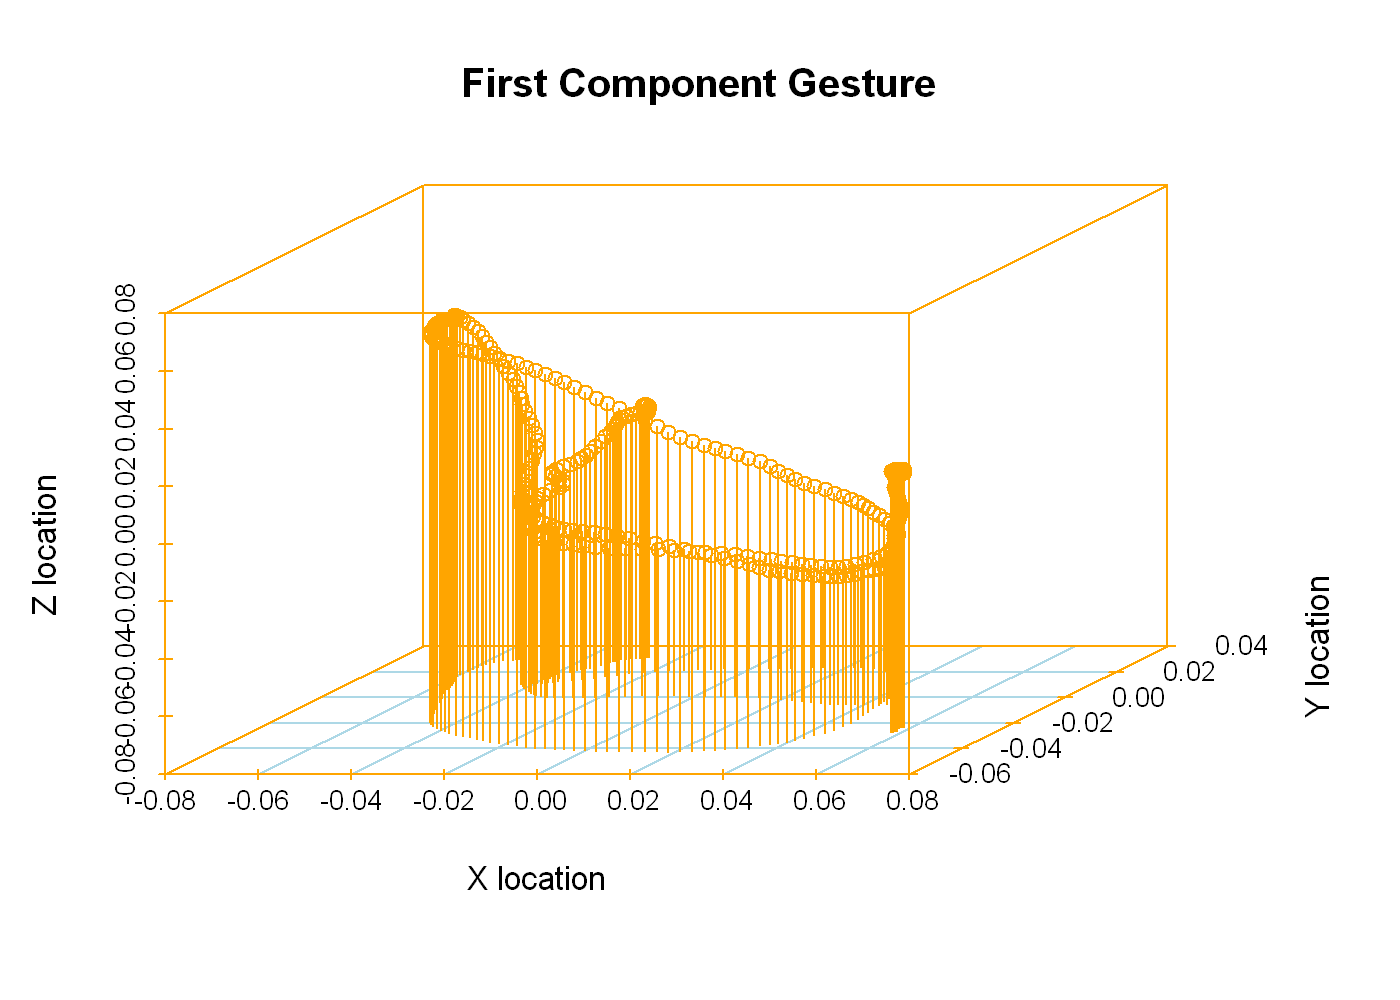

In [24]:
print_cum_var(pca_1)
summary(pca_1)
draw_eigenv(pca_1,1)
draw_component(pca_1)

The motion depicted by the first component is represented above with the orange color.

### Gesture 2

[1] "34.7% of variability is covered by the first two components."


Importance of components:
                           PC1    PC2     PC3     PC4     PC5    PC6     PC7
Standard deviation     15.1328 9.9624 8.31065 7.35924 7.19483 6.4553 5.82275
Proportion of Variance  0.2423 0.1050 0.07309 0.05731 0.05478 0.0441 0.03588
Cumulative Proportion   0.2423 0.3474 0.42044 0.47776 0.53253 0.5766 0.61251
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     5.50197 5.47907 5.07457 4.75745 4.64262 4.28680 4.02305
Proportion of Variance 0.03203 0.03177 0.02725 0.02395 0.02281 0.01945 0.01713
Cumulative Proportion  0.64454 0.67631 0.70356 0.72751 0.75032 0.76976 0.78689
                          PC15    PC16    PC17    PC18    PC19    PC20   PC21
Standard deviation     3.94678 3.51723 3.41381 3.35846 3.12303 3.02098 2.9643
Proportion of Variance 0.01648 0.01309 0.01233 0.01194 0.01032 0.00966 0.0093
Cumulative Proportion  0.80337 0.81646 0.82880 0.84073 0.85105 0.86071 0.8700
                          PC22    PC23

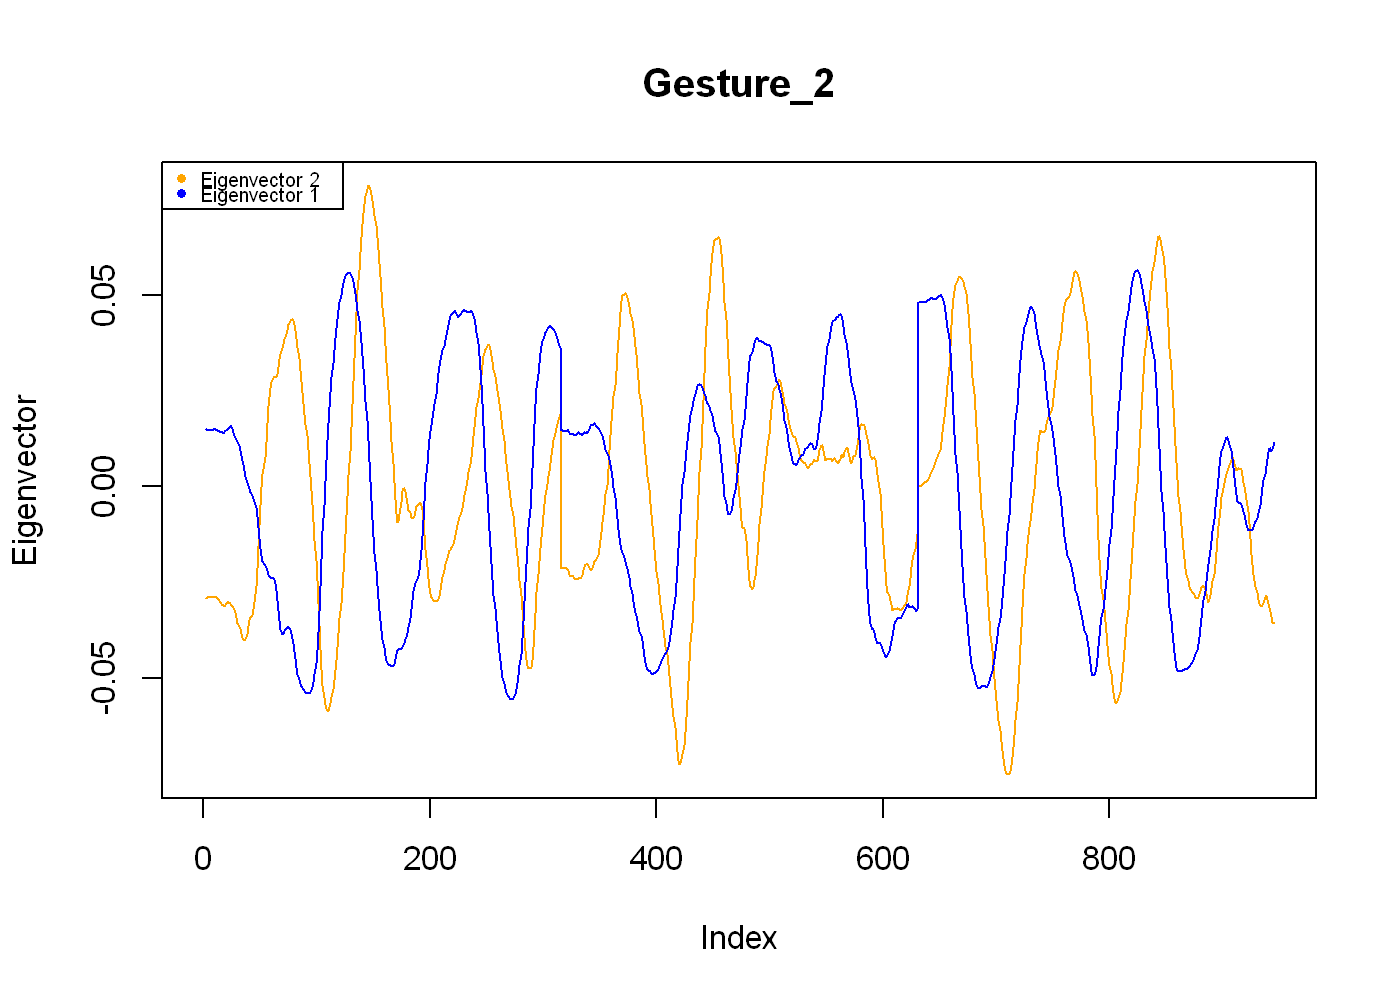

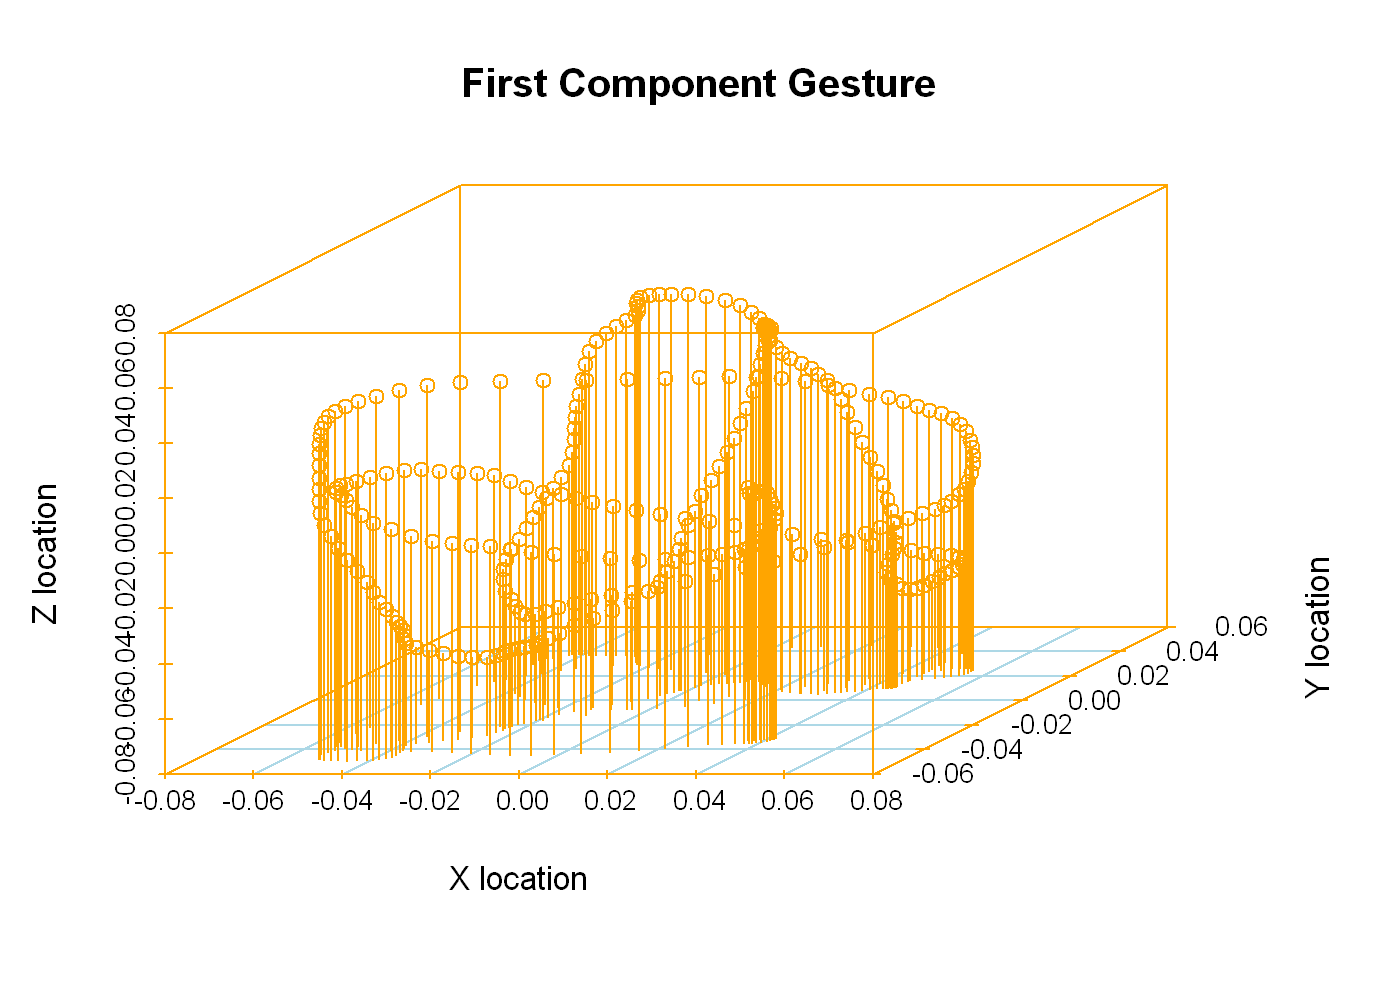

In [25]:
print_cum_var(pca_2)
summary(pca_2)
draw_eigenv(pca_2,2)
draw_component(pca_2)

### Gesture 3

[1] "42.2% of variability is covered by the first two components."


Importance of components:
                           PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     16.3423 11.4732 10.2338 8.21046 7.49130 7.24465 5.99537
Proportion of Variance  0.2826  0.1393  0.1108 0.07134 0.05939 0.05554 0.03804
Cumulative Proportion   0.2826  0.4219  0.5327 0.60407 0.66346 0.71900 0.75703
                           PC8     PC9    PC10    PC11    PC12    PC13   PC14
Standard deviation     5.37671 5.31693 4.21397 3.81760 3.73651 3.54857 3.2095
Proportion of Variance 0.03059 0.02992 0.01879 0.01542 0.01477 0.01333 0.0109
Cumulative Proportion  0.78762 0.81754 0.83633 0.85175 0.86653 0.87985 0.8908
                          PC15    PC16   PC17    PC18    PC19  PC20    PC21
Standard deviation     3.11205 2.99126 2.7663 2.54334 2.49934 2.382 2.30904
Proportion of Variance 0.01025 0.00947 0.0081 0.00685 0.00661 0.006 0.00564
Cumulative Proportion  0.90100 0.91047 0.9186 0.92541 0.93202 0.938 0.94367
                          PC22    PC23    

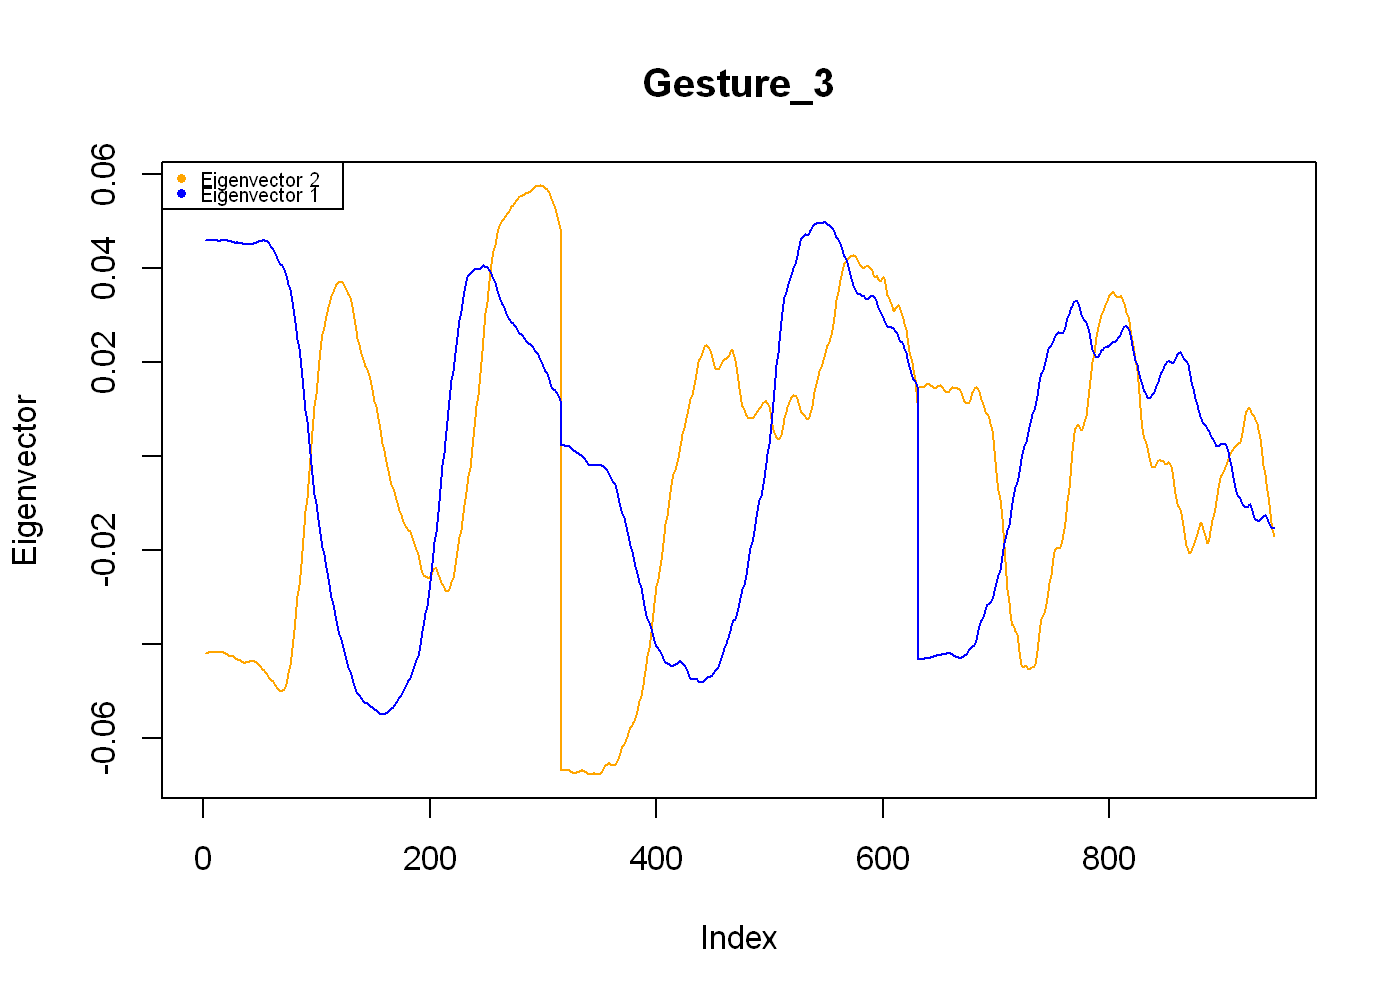

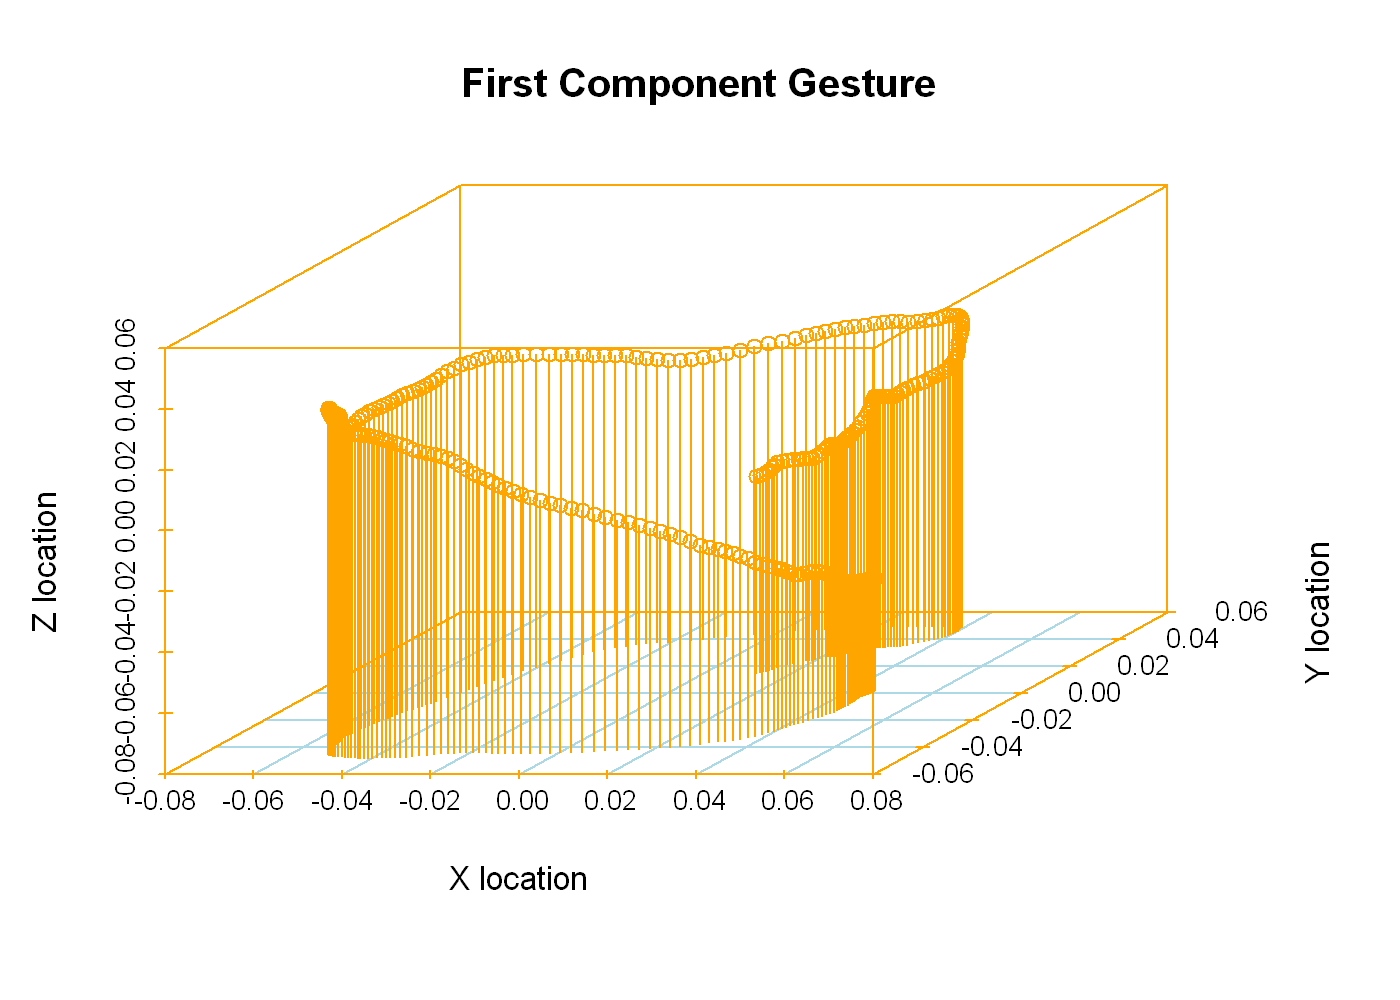

In [26]:
print_cum_var(pca_3)
summary(pca_3)
draw_eigenv(pca_3,3)
draw_component(pca_3)

### Gesture 4

[1] "37.2% of variability is covered by the first two components."


Importance of components:
                           PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     15.2414 10.8985 10.4851 8.82238 7.76573 7.10276 6.60402
Proportion of Variance  0.2458  0.1257  0.1163 0.08236 0.06382 0.05339 0.04615
Cumulative Proportion   0.2458  0.3715  0.4879 0.57021 0.63403 0.68741 0.73356
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     5.82794 5.31988 4.79628 4.13677 4.04735 3.67248 3.17718
Proportion of Variance 0.03594 0.02995 0.02434 0.01811 0.01733 0.01427 0.01068
Cumulative Proportion  0.76951 0.79945 0.82380 0.84191 0.85924 0.87351 0.88419
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     3.05042 2.99893 2.92178 2.88236 2.71256 2.40886 2.29676
Proportion of Variance 0.00985 0.00952 0.00903 0.00879 0.00779 0.00614 0.00558
Cumulative Proportion  0.89404 0.90356 0.91259 0.92138 0.92917 0.93531 0.94089
                          

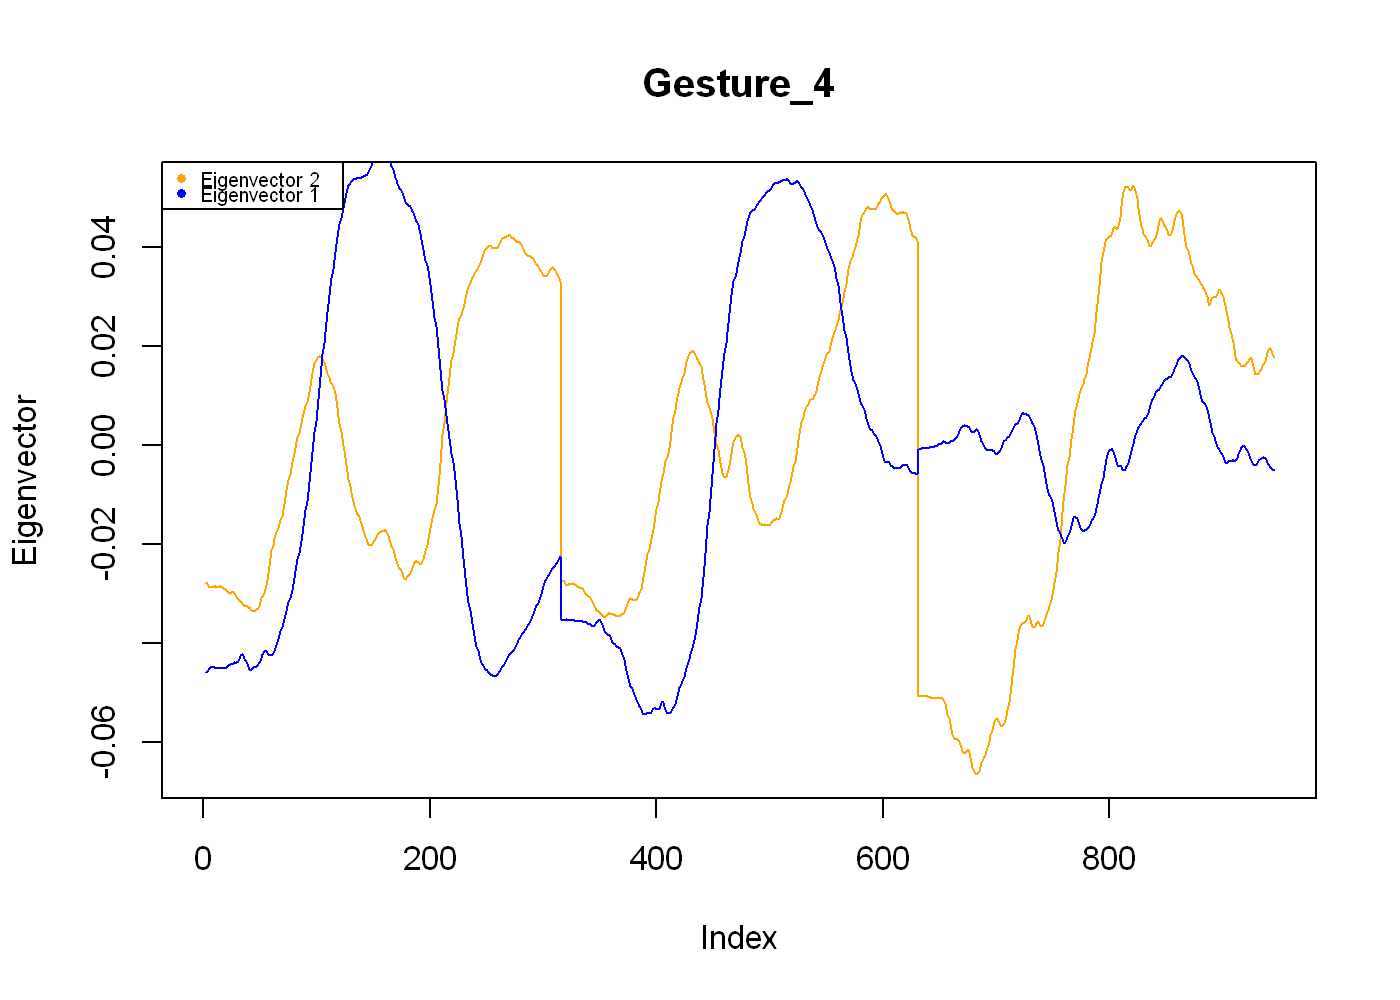

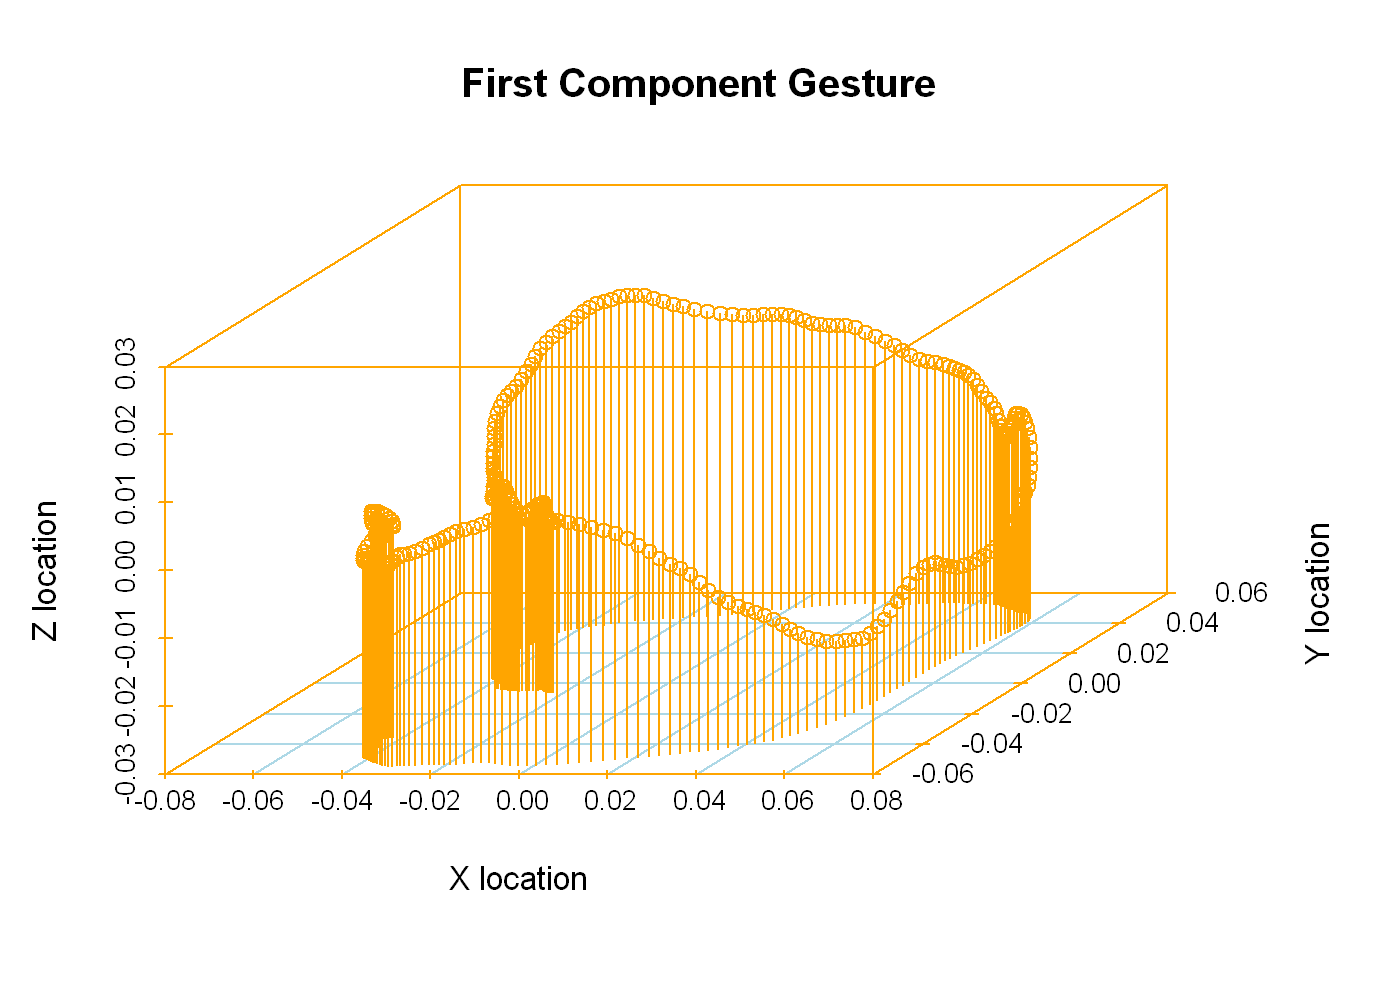

In [29]:
print_cum_var(pca_4)
summary(pca_4)
draw_eigenv(pca_4,4)
draw_component(pca_4)

### Gesture 5

[1] "45% of variability is covered by the first two components."


Importance of components:
                           PC1     PC2     PC3     PC4     PC5     PC6    PC7
Standard deviation     17.1306 11.4646 10.3018 8.71577 7.16913 6.43894 5.6014
Proportion of Variance  0.3105  0.1391  0.1123 0.08039 0.05439 0.04387 0.0332
Cumulative Proportion   0.3105  0.4496  0.5619 0.64231 0.69670 0.74057 0.7738
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     5.32249 5.03574 4.08072 4.00465 3.76646 3.53357 3.21909
Proportion of Variance 0.02998 0.02683 0.01762 0.01697 0.01501 0.01321 0.01097
Cumulative Proportion  0.80375 0.83059 0.84821 0.86518 0.88019 0.89341 0.90437
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     3.07720 2.97147 2.75991 2.60132 2.43697 2.33122 2.19954
Proportion of Variance 0.01002 0.00934 0.00806 0.00716 0.00628 0.00575 0.00512
Cumulative Proportion  0.91439 0.92374 0.93180 0.93896 0.94524 0.95099 0.95611
                          PC22

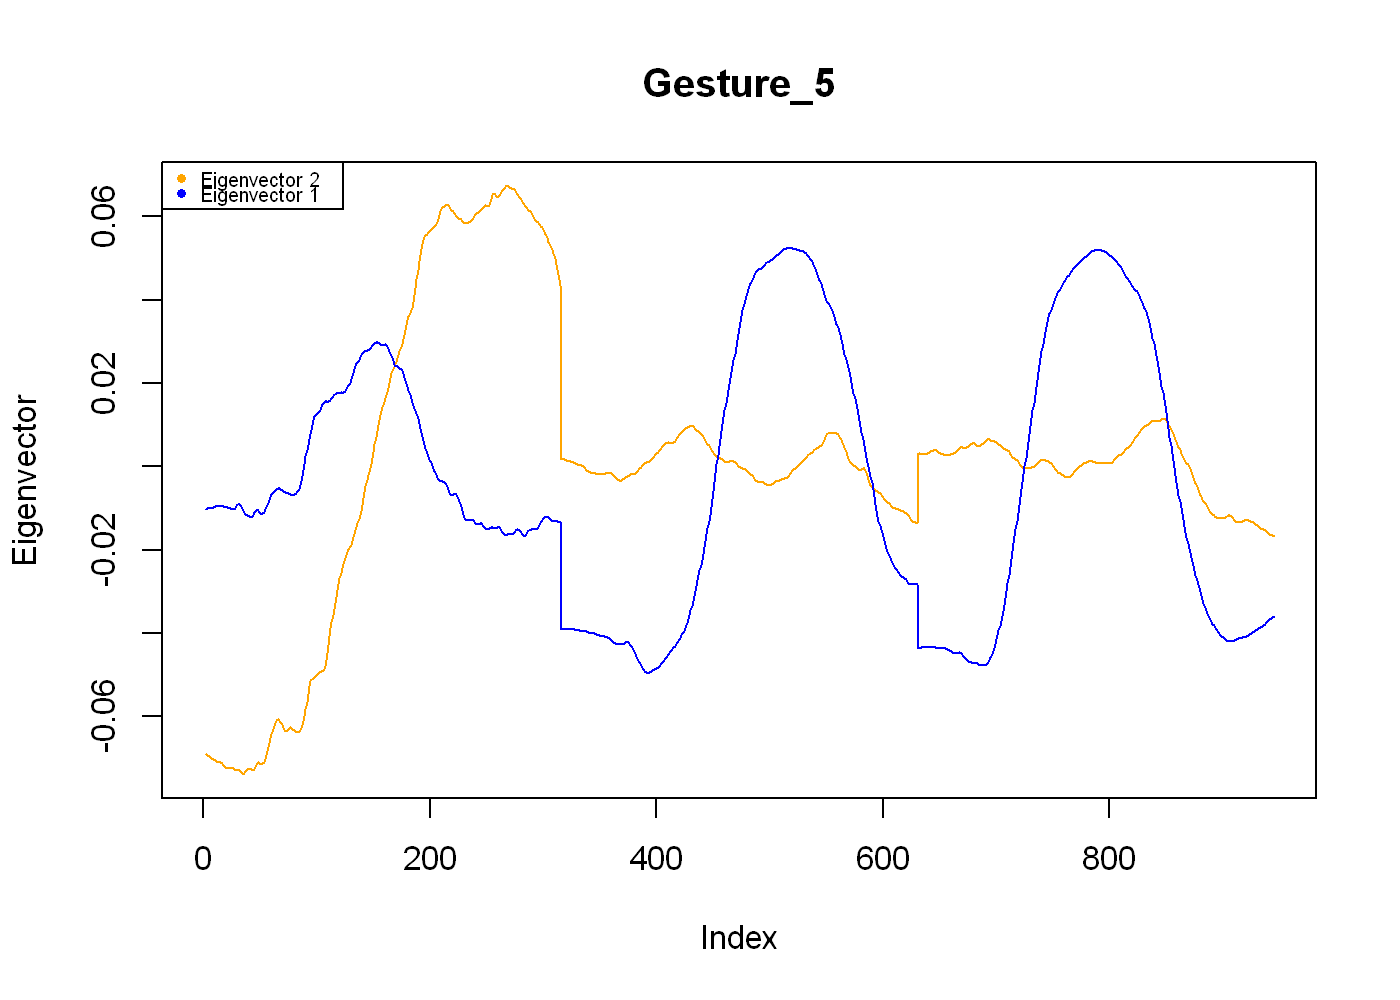

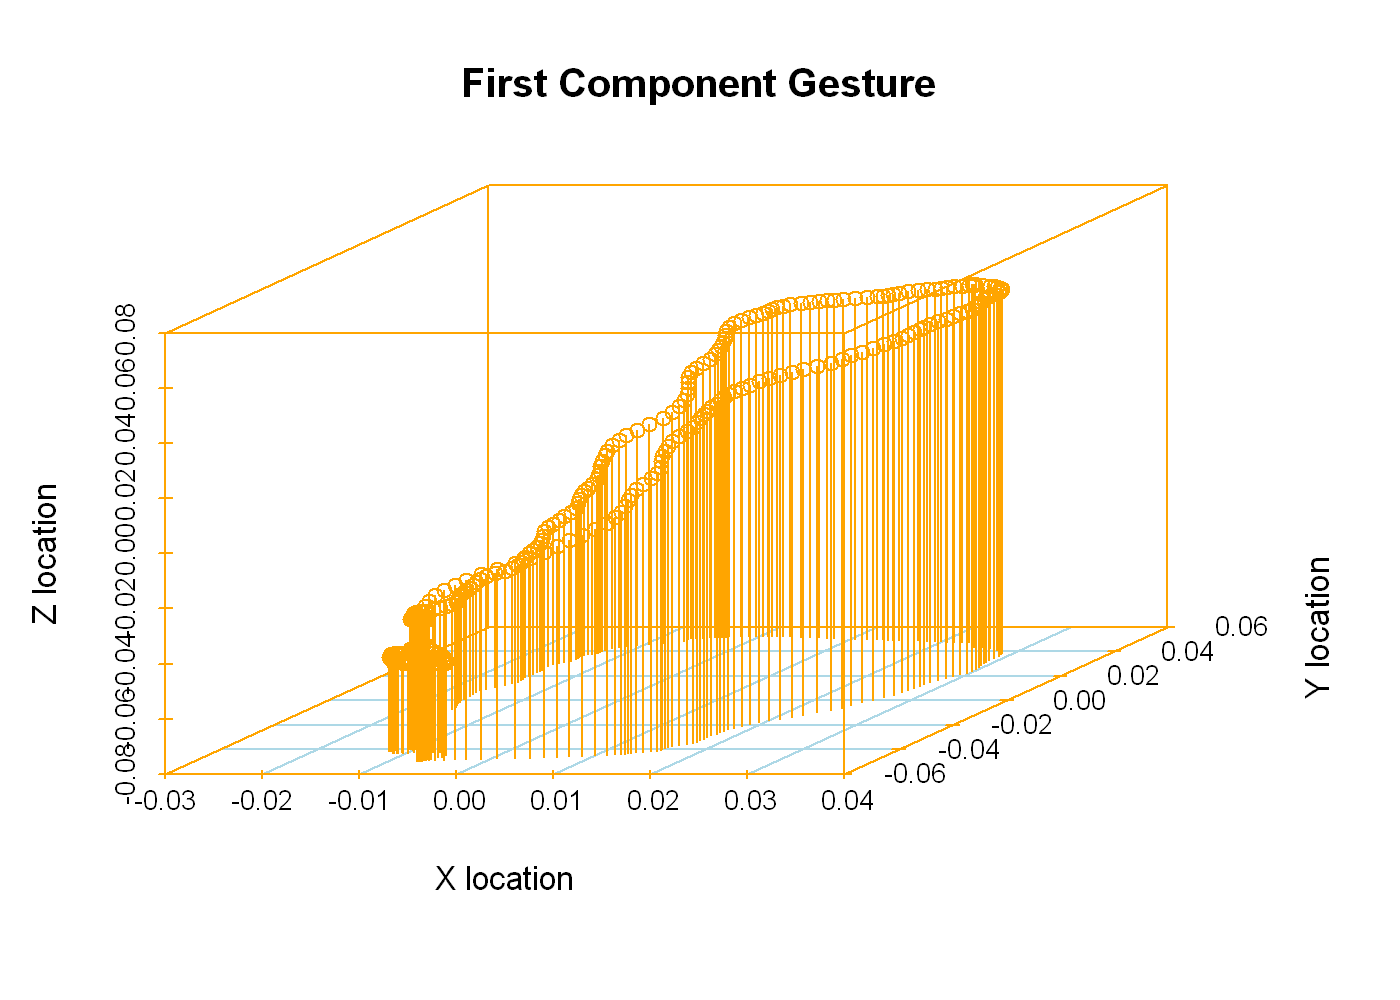

In [30]:
print_cum_var(pca_5)
summary(pca_5)
draw_eigenv(pca_5,5)
draw_component(pca_5)

### Gesture 6

[1] "45.2% of variability is covered by the first two components."


Importance of components:
                           PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     16.7176 12.1673 10.4490 7.86093 6.40130 6.31779 5.46688
Proportion of Variance  0.2957  0.1567  0.1155 0.06539 0.04336 0.04224 0.03163
Cumulative Proportion   0.2957  0.4524  0.5679 0.63333 0.67669 0.71893 0.75056
                           PC8     PC9    PC10    PC11    PC12   PC13    PC14
Standard deviation     5.36186 4.76522 4.24618 3.98344 3.87022 3.7273 3.44197
Proportion of Variance 0.03042 0.02403 0.01908 0.01679 0.01585 0.0147 0.01254
Cumulative Proportion  0.78098 0.80501 0.82409 0.84088 0.85673 0.8714 0.88397
                          PC15    PC16   PC17    PC18    PC19    PC20    PC21
Standard deviation     3.24368 2.94492 2.8507 2.67898 2.60732 2.52627 2.36684
Proportion of Variance 0.01113 0.00918 0.0086 0.00759 0.00719 0.00675 0.00593
Cumulative Proportion  0.89510 0.90428 0.9129 0.92047 0.92767 0.93442 0.94035
                          PC22    

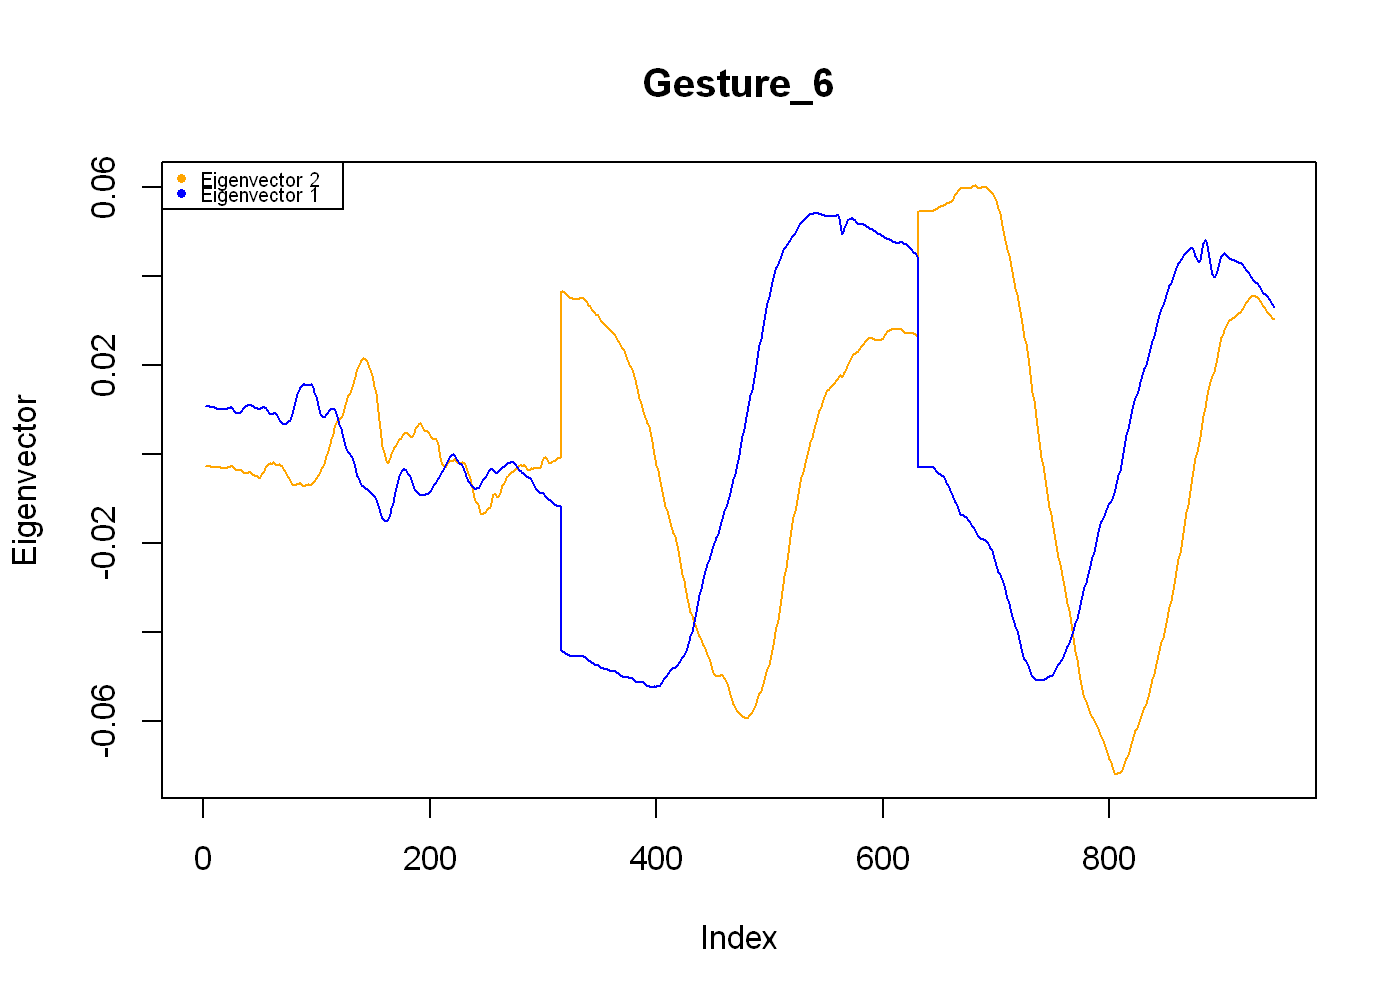

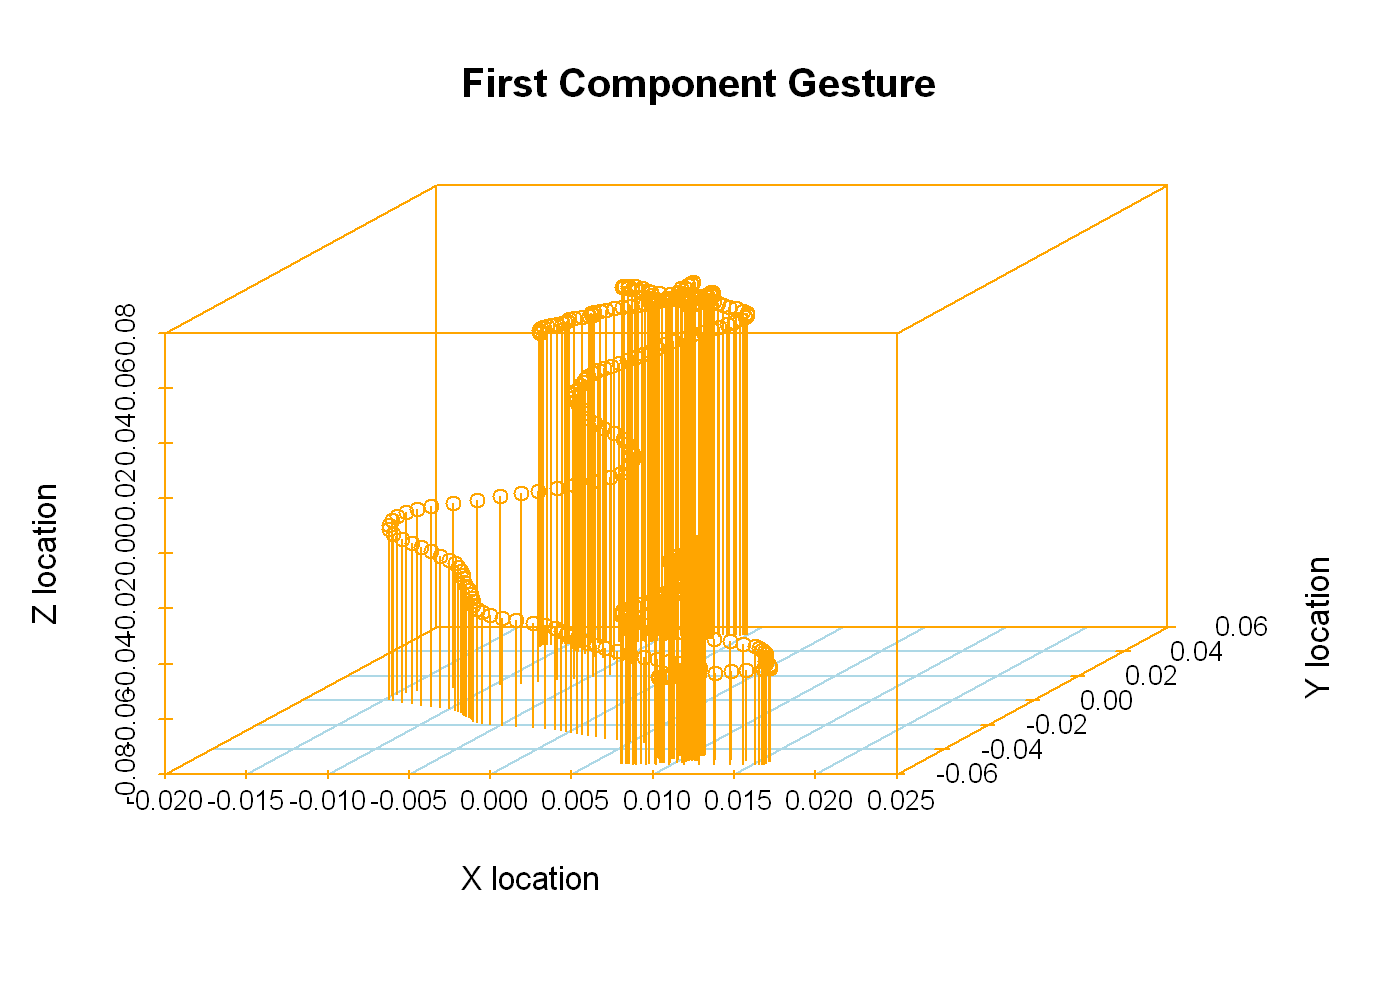

In [31]:
print_cum_var(pca_6)
summary(pca_6)
draw_eigenv(pca_6,6)
draw_component(pca_6)

### Gesture 7

[1] "45.1% of variability is covered by the first two components."


Importance of components:
                           PC1     PC2     PC3    PC4     PC5    PC6     PC7
Standard deviation     16.6644 12.1861 10.1785 7.9747 7.28341 6.2701 5.23208
Proportion of Variance  0.2939  0.1571  0.1096 0.0673 0.05614 0.0416 0.02897
Cumulative Proportion   0.2939  0.4510  0.5606 0.6279 0.68407 0.7257 0.75464
                           PC8     PC9    PC10    PC11    PC12   PC13    PC14
Standard deviation     5.12389 4.89978 4.18900 3.97769 3.54606 3.3251 3.20672
Proportion of Variance 0.02778 0.02541 0.01857 0.01674 0.01331 0.0117 0.01088
Cumulative Proportion  0.78242 0.80783 0.82640 0.84314 0.85645 0.8681 0.87903
                          PC15    PC16    PC17    PC18    PC19   PC20    PC21
Standard deviation     2.97135 2.78779 2.66474 2.64096 2.45244 2.4019 2.22272
Proportion of Variance 0.00934 0.00822 0.00751 0.00738 0.00636 0.0061 0.00523
Cumulative Proportion  0.88837 0.89659 0.90411 0.91149 0.91785 0.9240 0.92919
                         PC22    PC23    P

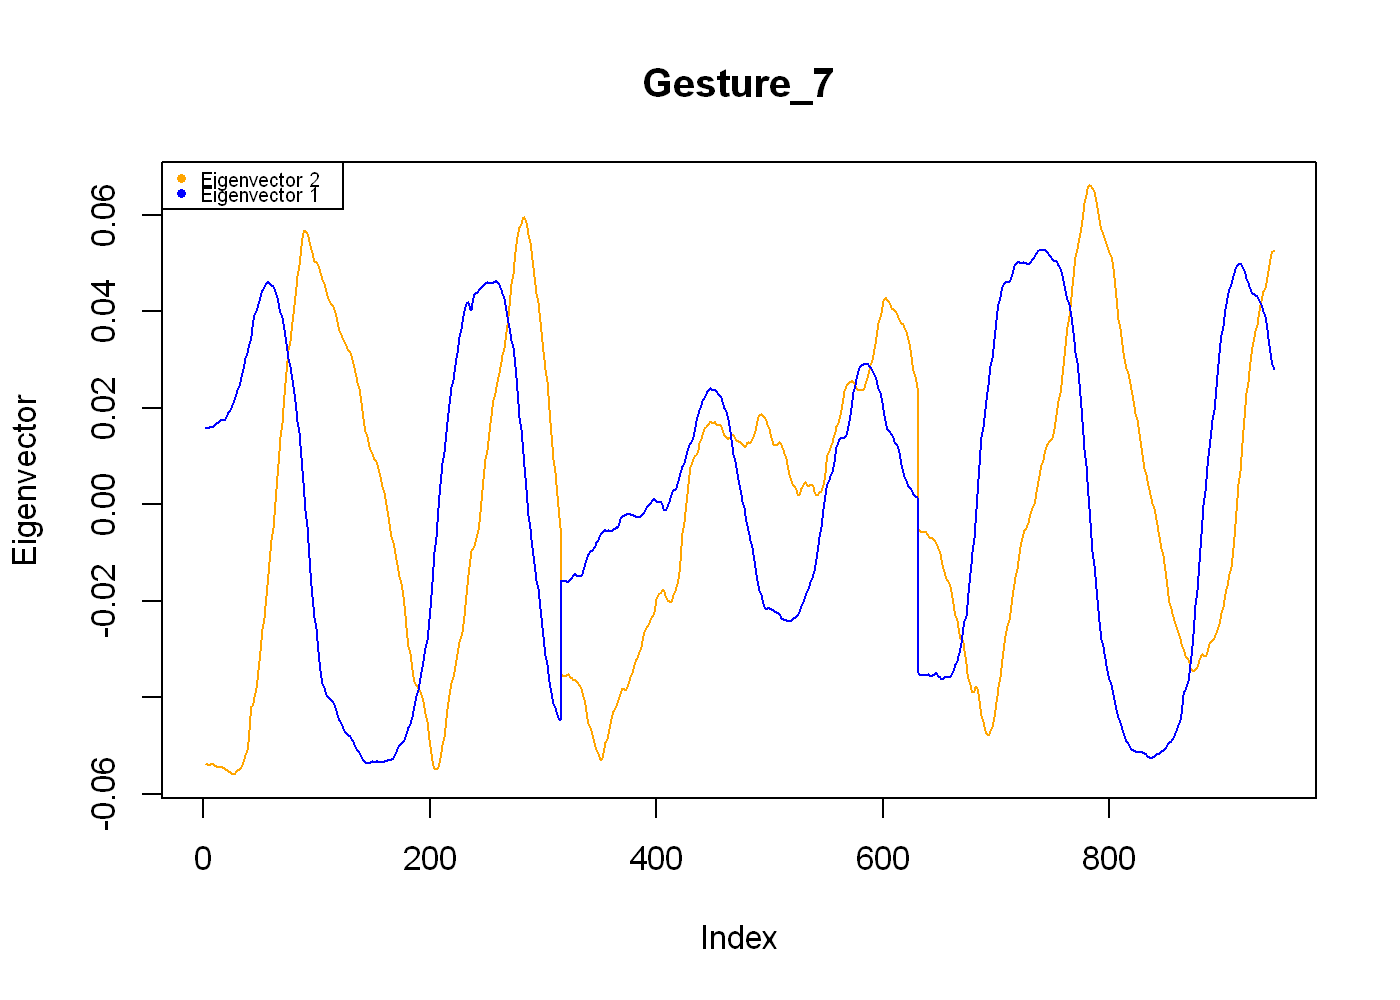

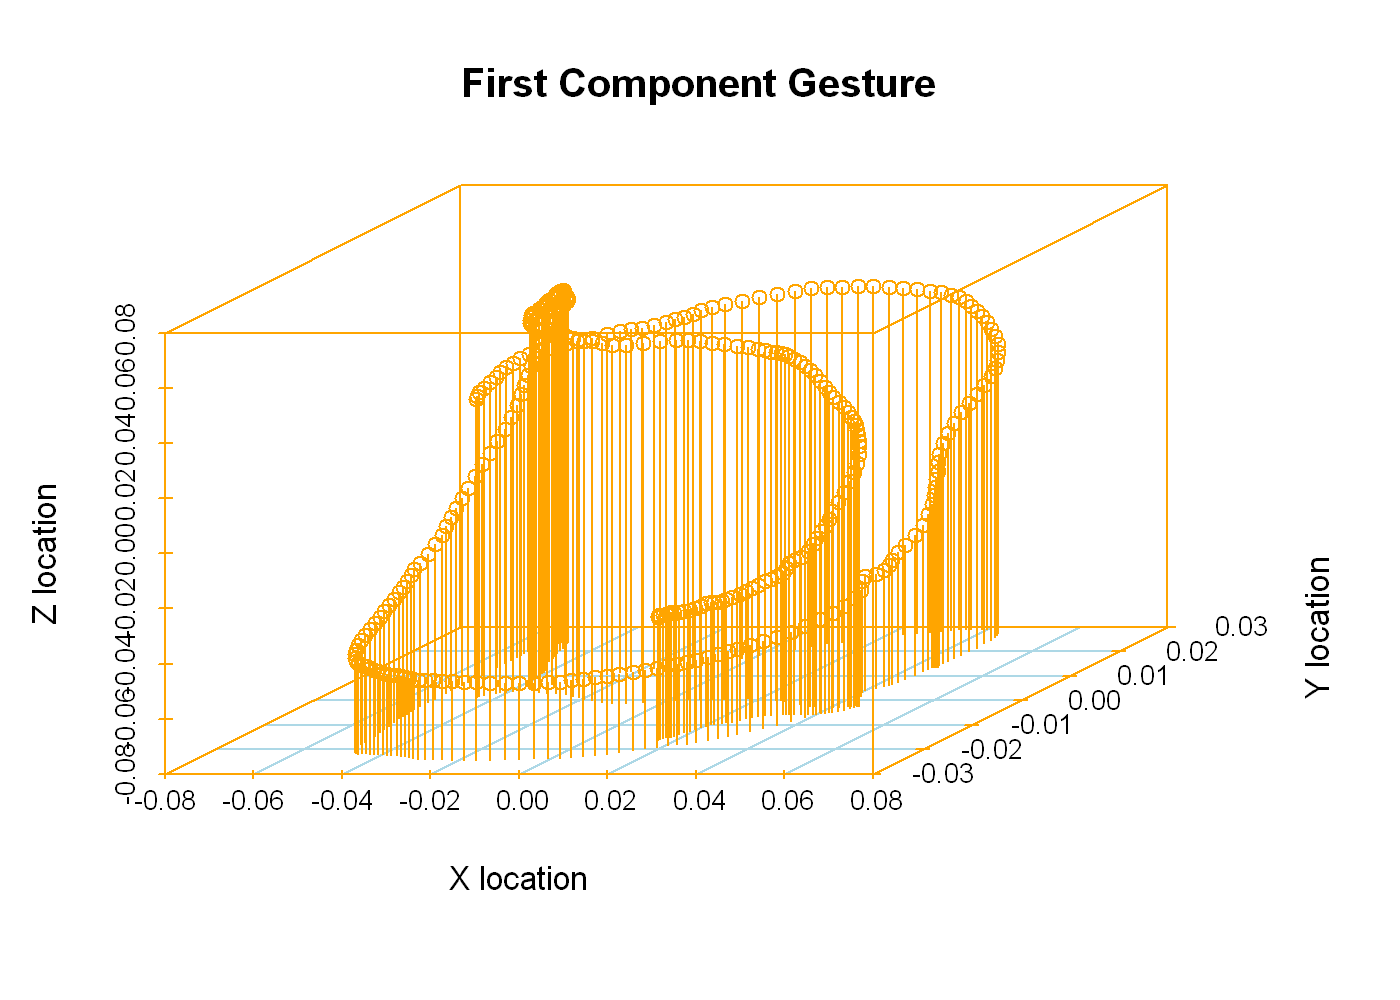

In [32]:
print_cum_var(pca_7)
summary(pca_7)
draw_eigenv(pca_7,7)
draw_component(pca_7)

### Gesture 8

[1] "59.3% of variability is covered by the first two components."


Importance of components:
                           PC1     PC2     PC3     PC4     PC5    PC6     PC7
Standard deviation     18.9381 14.1902 9.30303 6.95934 5.83177 5.3067 5.05630
Proportion of Variance  0.3795  0.2131 0.09158 0.05125 0.03599 0.0298 0.02705
Cumulative Proportion   0.3795  0.5926 0.68419 0.73544 0.77143 0.8012 0.82829
                           PC8    PC9    PC10   PC11    PC12    PC13    PC14
Standard deviation     4.26830 4.1009 3.60545 3.3818 3.09395 3.03556 2.89707
Proportion of Variance 0.01928 0.0178 0.01376 0.0121 0.01013 0.00975 0.00888
Cumulative Proportion  0.84757 0.8654 0.87912 0.8912 0.90135 0.91110 0.91998
                          PC15    PC16    PC17    PC18   PC19    PC20    PC21
Standard deviation     2.50375 2.43893 2.39250 2.32956 2.1068 2.02905 1.89761
Proportion of Variance 0.00663 0.00629 0.00606 0.00574 0.0047 0.00436 0.00381
Cumulative Proportion  0.92661 0.93291 0.93897 0.94471 0.9494 0.95376 0.95757
                          PC22    PC23    

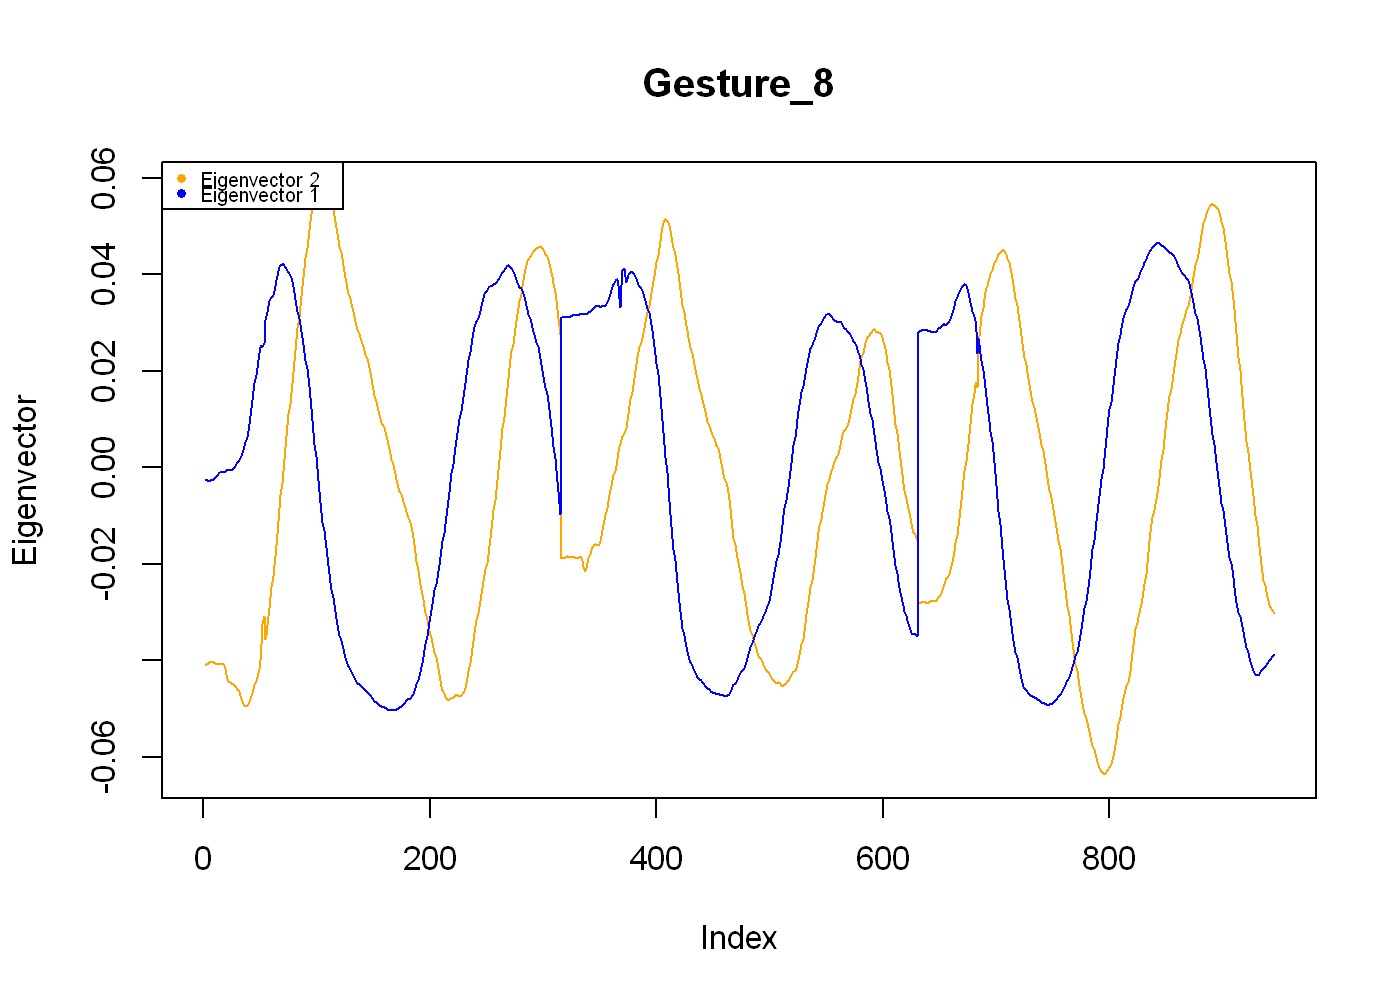

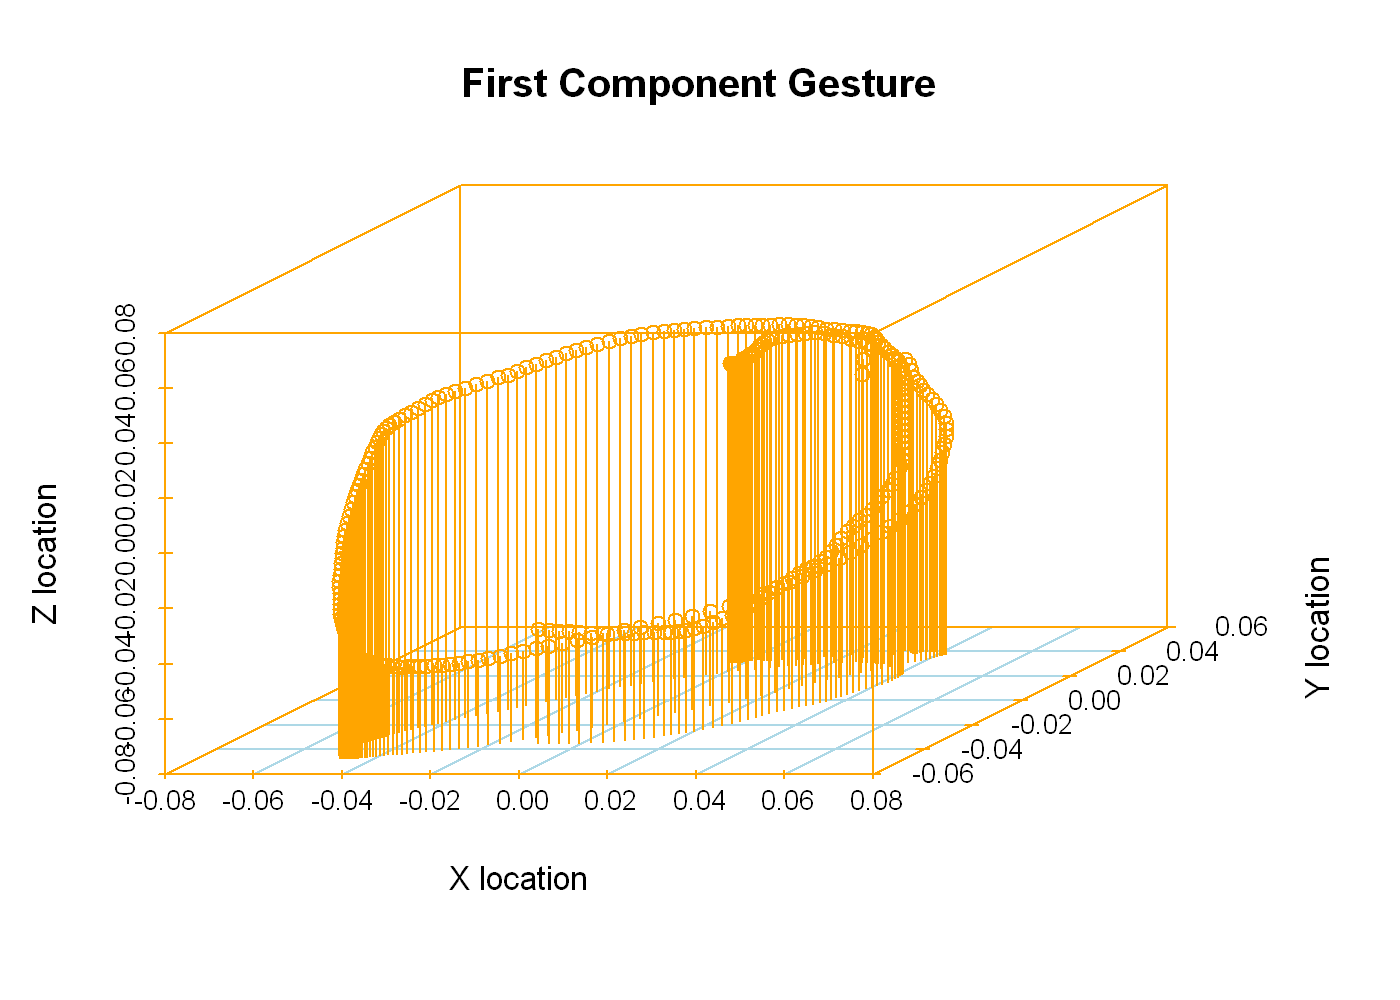

In [33]:
print_cum_var(pca_8)
summary(pca_8)
draw_eigenv(pca_8,8)
draw_component(pca_8)

## Comments

Eigenvectors focus on the timestamp and axis pairs which stand out as signature movements in a gesture. In other words, eigenvectors aims to capture variability as much as possible. Therefore, they highlight the moment-axis pairs contribute to the variation in the component more. Briefly, eigenvectors can be used to determine the distinctive characteristics of a gesture.

Moreover, by looking at the timeseries graphs of the gestures ( linegraphs showing two components), we can deduce that:

* in one dimensional gestures like gesture 4 and 5 (depending on the graphs I drew under 3., just before 3.1): we observe counter directed movements. 
This is also observable in timeseries graphs of these gestures. Graphs of the first components of gesture 4 and 5 seem symmetric.
2 Humps in beginning of gesture 4 graph are present in the end of gesture 5 graph. This indicates that their movement in the z_axis differs while they behave similar in x and y axes. 

* Besides, in gestures like 7 and 8 eigenvectors, 1 and 2 resemble each other in general. One of them seems like a lagged version of the other. This shows that timeseries property(the relationship between data points that follow each other) of the input data is still reflected by the components. In a simpler perspective, some moment-axis pairs are important in terms of maximizing variability in the eigenvector.

* 